# NGC 3201 Analysis

In [2]:
import matplotlib.pyplot as mp
import read_dao
import sys
import coordinates
import numpy as np
from matplotlib.ticker import ScalarFormatter
from astropy.wcs import WCS
from astropy.io import fits
import optical
import lightcurves
import calibration
import analysis_routines
import variables
import glob
import re
from astropy.stats import sigma_clip
%matplotlib inline 

In [3]:
target = 'NGC3201'
folder = '/Volumes/Annie/CRRP/'+target+'/'
optical_dir = '/Volumes/Annie/CRRP/OpticalCatalogs/'
cluster_ra = '10:17:36.82'
cluster_dec = '-46:24:44.9'

## Cluster Snapshot

In [3]:
dtype1 = np.dtype([('img', 'S30'), ('ra', float), ('dec', float)])
ch1_data = np.loadtxt(folder+'I1_centers.txt', dtype=dtype1, usecols=(0,1,2))
ch2_data = np.loadtxt(folder+'I2_centers.txt', dtype=dtype1, usecols=(0,1,2))

#### Plot AOR footprint

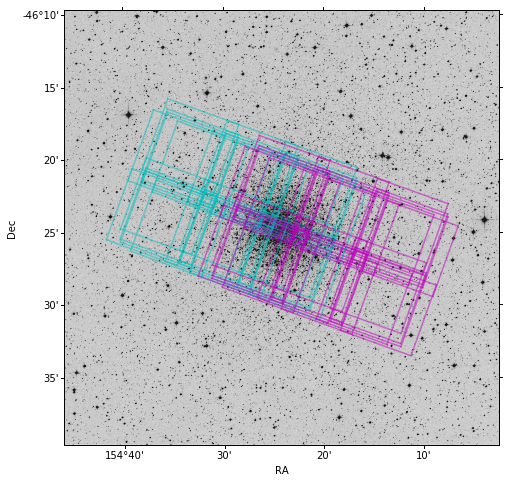

In [4]:
from matplotlib.colors import LogNorm
hdu = fits.open(folder+'dss-'+target+'.fits')[0]
wcs = WCS(hdu.header)
fig = mp.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=wcs)
mp.imshow(hdu.data, origin='lower', cmap='gray_r')#, norm=LogNorm())

for ind, fits_file in enumerate(ch1_data['img']):
    w = WCS(folder+fits_file)
    ra1, dec1 = w.wcs_pix2world(1, 1, 0)
    ra2, dec2 = w.wcs_pix2world(1, 256, 0)
    ra3, dec3 = w.wcs_pix2world(256, 256, 0)
    ra4, dec4 = w.wcs_pix2world(256, 1, 0)
# Plot [3.6] AOR footprint
  #  mp.plot(ch1_data['ra'][ind], ch1_data['dec'][ind], 'ro')
    ax.plot([ra1, ra2], [dec1, dec2], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra2, ra3], [dec2, dec3], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra3, ra4], [dec3, dec4], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra4, ra1], [dec4, dec1], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
for ind, fits_file in enumerate(ch2_data['img']):
    w = WCS(folder+fits_file)
    ra1, dec1 = w.wcs_pix2world(1, 1, 0)
    ra2, dec2 = w.wcs_pix2world(1, 256, 0)
    ra3, dec3 = w.wcs_pix2world(256, 256, 0)
    ra4, dec4 = w.wcs_pix2world(256, 1, 0)
# Plot [4.5] AOR footprint
  #  mp.plot(ch2_data['ra'][ind], ch2_data['dec'][ind], 'ro')
    ax.plot([ra1, ra2], [dec1, dec2], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra2, ra3], [dec2, dec3], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra3, ra4], [dec3, dec4], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra4, ra1], [dec4, dec1], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

x_formatter = ScalarFormatter(useOffset=False)
mp.gca().xaxis.set_major_formatter(x_formatter)
mp.show()

#### Map of source catalog with field boundaries shown

Reading optical catalog for NGC3201...
Finished reading optical catalog.


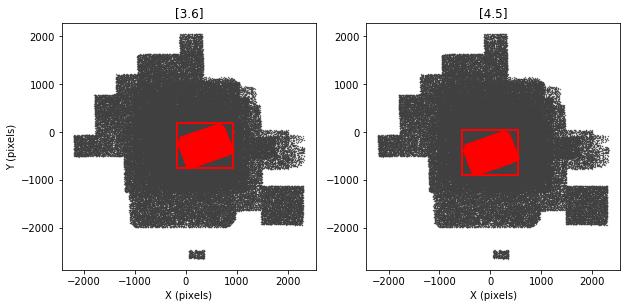

In [11]:
fig = mp.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# read optical catalog and add to plots
ids, xcat, ycat, ra, dec = optical.read_optical_fnl(optical_dir, target)
ax1.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
ax2.plot(xcat, ycat, '.', color='0.25', markersize=0.75)

# read boundaries of IRAC data
dtype1 = np.dtype([('xmin', float), ('xmax', float), ('ymin', float), ('ymax', float)])
I1cuts = np.loadtxt(folder+'DeepMosaic/I1-deep-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))
I2cuts = np.loadtxt(folder+'DeepMosaic/I2-deep-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))

ax1.plot([I1cuts['xmin'], I1cuts['xmax']], [I1cuts['ymin'], I1cuts['ymin']],
    '-', color='r', linewidth=2)
ax1.plot([I1cuts['xmin'], I1cuts['xmax']], [I1cuts['ymax'], I1cuts['ymax']],
    '-', color='r', linewidth=2)
ax1.plot([I1cuts['xmin'], I1cuts['xmin']], [I1cuts['ymin'], I1cuts['ymax']],
    '-', color='r', linewidth=2)
ax1.plot([I1cuts['xmax'], I1cuts['xmax']], [I1cuts['ymin'], I1cuts['ymax']],
    '-', color='r', linewidth=2)
ax1.set_xlabel('X (pixels)')
ax1.set_ylabel('Y (pixels)')
ax1.set_title('[3.6]')
ax2.plot([I2cuts['xmin'], I2cuts['xmax']], [I2cuts['ymin'], I2cuts['ymin']],
    '-', color='r', linewidth=2)
ax2.plot([I2cuts['xmin'], I2cuts['xmax']], [I2cuts['ymax'], I2cuts['ymax']],
    '-', color='r', linewidth=2)
ax2.plot([I2cuts['xmin'], I2cuts['xmin']], [I2cuts['ymin'], I2cuts['ymax']],
    '-', color='r', linewidth=2)
ax2.plot([I2cuts['xmax'], I2cuts['xmax']], [I2cuts['ymin'], I2cuts['ymax']],
    '-', color='r', linewidth=2)
ax2.set_xlabel('X (pixels)')
ax2.set_title('[4.5]')


# Add transformed catalogs
I1ids, I1x, I1y, I1mag, I1err = read_dao.read_alf(folder+'DeepMosaic/'+target+'_I1_deep_dn.alf')
I2ids, I2x, I2y, I2mag, I2err = read_dao.read_alf(folder+'DeepMosaic/'+target+'_I2_deep_dn.alf')

filesI1, x_offI1, y_offI1, transformI1, dofI1 = read_dao.read_mch(folder+'DeepMosaic/op-I1-deep.mch')
filesI2, x_offI2, y_offI2, transformI2, dofI2 = read_dao.read_mch(folder+'DeepMosaic/op-I2-deep.mch')

xI1 = float(x_offI1[1])+float(transformI1[1][0])*I1x+float(transformI1[1][1])*I1y
yI1 = float(y_offI1[1])+float(transformI1[1][2])*I1x+float(transformI1[1][3])*I1y
xI2 = float(x_offI2[1])+float(transformI2[1][0])*I2x+float(transformI2[1][1])*I2y
yI2 = float(y_offI2[1])+float(transformI2[1][2])*I2x+float(transformI2[1][3])*I2y

ax1.plot(xI1, yI1, '.', markersize=1.8, color='r')
ax2.plot(xI2, yI2, '.', markersize=1.8, color='r')


mp.show()

# Calibration

In [3]:
calibration.find_lst_stars(target, 'I1', data_dir=folder)
calibration.find_lst_stars(target, 'I2', data_dir=folder)

[112923] [113107]
[114776] []
[111097] []
[104869] []
[119936] []
[124651] []
[68073] []
[117251] [117358]
[119197] []
[127509] [127316]
[114121] [114317]
[102232] [102381]
[109532] [109743 109609 109568]
[120103] []
[56242] [56331]
[121723] []
[118559] []
[125386] []
[126801] []
[114760] []
[123048] []
[110680] [110931]
[105454] [105803 105521 105254 105917]
[53760] [53578 53715 54069]
[116231] [116255]
[117551] []
[55453] [55414 55901 55021 55179 55683]
[108673] [108524 108327]
[54547] [54763]
[119226] []
[124531] [124363]
[124120] [124016 123979]
[56444] [56301 56439 55917]
[117285] []
[120753] []
[113710] [113889]
[110393] [110696]
[93819] [93953 93721 93251 94489 94239 93578 93395]
[108776] [108841]
[110152] []
[111976] [111957]
[121073] []
[117955] []
[59224] [59204]
[115902] []
[99961] [100196  99367 100347]
[53014] [53291 52564]
[102063] [102058]
[112876] []
[113246] []
[116881] []
[81845] [81841]
[83184] []
[109670] []
[107861] []
[76589] [76387]
[99050] [98978]
[48128] [47848

In [3]:
calibration.do_ap_phot(target, 'I1', 30, data_dir=folder, dao_dir='/usr/local/phot/')
calibration.do_ap_phot(target, 'I2', 30, data_dir=folder, dao_dir='/usr/local/phot/')


  READ NOISE (ADU; 1 frame) =     3.95        GAIN (e-/ADU; 1 frame) =     3.70
 LOW GOOD DATUM (in sigmas) =    10.00      HIGH GOOD DATUM (in ADU) = 30000.00
             FWHM OF OBJECT =     2.00         THRESHOLD (in sigmas) =     6.00
  LS (LOW SHARPNESS CUTOFF) =     0.30    HS (HIGH SHARPNESS CUTOFF) =     1.40
  LR (LOW ROUNDNESS CUTOFF) =    -1.00    HR (HIGH ROUNDNESS CUTOFF) =     1.00
             WATCH PROGRESS =    -1.00                FITTING RADIUS =     2.00
                 PSF RADIUS =     9.00                  VARIABLE PSF =     0.00
              SKY ESTIMATOR =     0.00            ANALYTIC MODEL PSF =     2.00
  EXTRA PSF CLEANING PASSES =     5.00       USE SATURATED PSF STARS =     0.00
       PERCENT ERROR (in %) =     0.75          PROFILE ERROR (in %) =     5.00

 Command: at NGC3201:I1_46768128_01.fits
at NGC3201:I1_46768128_01.fits

     NGC3201:I1_46768128_01...               


                                      Picture size:    256   256


 Command: 

 PHO> 


 Input position file (default 
                       NGC3201:I1_46768128_08.coo): 

   Output file (default NGC3201:I1_46768128_08.ap): 


 Command: at NGC3201:I1_46768128_09.fits
at NGC3201:I1_46768128_09.fits

     NGC3201:I1_46768128_09...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46768128_25.coo): 

   Output file (default NGC3201:I1_46768128_25.ap): 


 Command: at NGC3201:I1_46768128_26.fits
at NGC3201:I1_46768128_26.fits

     NGC3201:I1_46768128_26...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46768384_12.coo): 

   Output file (default NGC3201:I1_46768384_12.ap): 


 Command: at NGC3201:I1_46768384_13.fits
at NGC3201:I1_46768384_13.fits

     NGC3201:I1_46768384_13...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46768384_29.coo): 

   Output file (default NGC3201:I1_46768384_29.ap): 


 Command: at NGC3201:I1_46768384_30.fits
at NGC3201:I1_46768384_30.fits

     NGC3201:I1_46768384_30...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46768640_16.coo): 

   Output file (default NGC3201:I1_46768640_16.ap): 


 Command: at NGC3201:I1_46768640_17.fits
at NGC3201:I1_46768640_17.fits

     NGC3201:I1_46768640_17...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46833408_03.coo): 

   Output file (default NGC3201:I1_46833408_03.ap): 


 Command: at NGC3201:I1_46833408_04.fits
at NGC3201:I1_46833408_04.fits

     NGC3201:I1_46833408_04...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46833408_20.coo): 

   Output file (default NGC3201:I1_46833408_20.ap): 


 Command: at NGC3201:I1_46833408_21.fits
at NGC3201:I1_46833408_21.fits

     NGC3201:I1_46833408_21...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46833920_07.coo): 

   Output file (default NGC3201:I1_46833920_07.ap): 


 Command: at NGC3201:I1_46833920_08.fits
at NGC3201:I1_46833920_08.fits

     NGC3201:I1_46833920_08...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46833920_24.coo): 

   Output file (default NGC3201:I1_46833920_24.ap): 


 Command: at NGC3201:I1_46833920_25.fits
at NGC3201:I1_46833920_25.fits

     NGC3201:I1_46833920_25...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46834432_11.coo): 

   Output file (default NGC3201:I1_46834432_11.ap): 


 Command: at NGC3201:I1_46834432_12.fits
at NGC3201:I1_46834432_12.fits

     NGC3201:I1_46834432_12...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46834432_28.coo): 

   Output file (default NGC3201:I1_46834432_28.ap): 


 Command: at NGC3201:I1_46834432_29.fits
at NGC3201:I1_46834432_29.fits

     NGC3201:I1_46834432_29...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46834944_15.coo): 

   Output file (default NGC3201:I1_46834944_15.ap): 


 Command: at NGC3201:I1_46834944_16.fits
at NGC3201:I1_46834944_16.fits

     NGC3201:I1_46834944_16...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46835456_02.coo): 

   Output file (default NGC3201:I1_46835456_02.ap): 


 Command: at NGC3201:I1_46835456_03.fits
at NGC3201:I1_46835456_03.fits

     NGC3201:I1_46835456_03...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46835456_19.coo): 

   Output file (default NGC3201:I1_46835456_19.ap): 


 Command: at NGC3201:I1_46835456_20.fits
at NGC3201:I1_46835456_20.fits

     NGC3201:I1_46835456_20...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46835968_06.coo): 

   Output file (default NGC3201:I1_46835968_06.ap): 


 Command: at NGC3201:I1_46835968_07.fits
at NGC3201:I1_46835968_07.fits

     NGC3201:I1_46835968_07...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46835968_23.coo): 

   Output file (default NGC3201:I1_46835968_23.ap): 


 Command: at NGC3201:I1_46835968_24.fits
at NGC3201:I1_46835968_24.fits

     NGC3201:I1_46835968_24...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46836992_10.coo): 

   Output file (default NGC3201:I1_46836992_10.ap): 


 Command: at NGC3201:I1_46836992_11.fits
at NGC3201:I1_46836992_11.fits

     NGC3201:I1_46836992_11...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46836992_27.coo): 

   Output file (default NGC3201:I1_46836992_27.ap): 


 Command: at NGC3201:I1_46836992_28.fits
at NGC3201:I1_46836992_28.fits

     NGC3201:I1_46836992_28...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46837760_14.coo): 

   Output file (default NGC3201:I1_46837760_14.ap): 


 Command: at NGC3201:I1_46837760_15.fits
at NGC3201:I1_46837760_15.fits

     NGC3201:I1_46837760_15...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46838528_01.coo): 

   Output file (default NGC3201:I1_46838528_01.ap): 


 Command: at NGC3201:I1_46838528_02.fits
at NGC3201:I1_46838528_02.fits

     NGC3201:I1_46838528_02...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I1_46838528_18.coo): 

   Output file (default NGC3201:I1_46838528_18.ap): 


 Command: at NGC3201:I1_46838528_19.fits
at NGC3201:I1_46838528_19.fits

     NGC3201:I1_46838528_19...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

                       NGC3201:I2_46768128_02.coo): 

   Output file (default NGC3201:I2_46768128_02.ap): 


 Command: at NGC3201:I2_46768128_03.fits
at NGC3201:I2_46768128_03.fits

     NGC3201:I2_46768128_03...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC

 PHO> 


 Input position file (default 
                       NGC3201:I2_46768128_11.coo): 

   Output file (default NGC3201:I2_46768128_11.ap): 


 Command: at NGC3201:I2_46768128_12.fits
at NGC3201:I2_46768128_12.fits

     NGC3201:I2_46768128_12...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46768128_28.coo): 

   Output file (default NGC3201:I2_46768128_28.ap): 


 Command: at NGC3201:I2_46768128_29.fits
at NGC3201:I2_46768128_29.fits

     NGC3201:I2_46768128_29...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46768384_15.coo): 

   Output file (default NGC3201:I2_46768384_15.ap): 


 Command: at NGC3201:I2_46768384_16.fits
at NGC3201:I2_46768384_16.fits

     NGC3201:I2_46768384_16...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46768640_02.coo): 

   Output file (default NGC3201:I2_46768640_02.ap): 


 Command: at NGC3201:I2_46768640_03.fits
at NGC3201:I2_46768640_03.fits

     NGC3201:I2_46768640_03...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46768640_19.coo): 

   Output file (default NGC3201:I2_46768640_19.ap): 


 Command: at NGC3201:I2_46768640_20.fits
at NGC3201:I2_46768640_20.fits

     NGC3201:I2_46768640_20...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46833408_06.coo): 

   Output file (default NGC3201:I2_46833408_06.ap): 


 Command: at NGC3201:I2_46833408_07.fits
at NGC3201:I2_46833408_07.fits

     NGC3201:I2_46833408_07...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46833408_23.coo): 

   Output file (default NGC3201:I2_46833408_23.ap): 


 Command: at NGC3201:I2_46833408_24.fits
at NGC3201:I2_46833408_24.fits

     NGC3201:I2_46833408_24...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46833920_10.coo): 

   Output file (default NGC3201:I2_46833920_10.ap): 


 Command: at NGC3201:I2_46833920_11.fits
at NGC3201:I2_46833920_11.fits

     NGC3201:I2_46833920_11...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46833920_27.coo): 

   Output file (default NGC3201:I2_46833920_27.ap): 


 Command: at NGC3201:I2_46833920_28.fits
at NGC3201:I2_46833920_28.fits

     NGC3201:I2_46833920_28...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46834432_14.coo): 

   Output file (default NGC3201:I2_46834432_14.ap): 


 Command: at NGC3201:I2_46834432_15.fits
at NGC3201:I2_46834432_15.fits

     NGC3201:I2_46834432_15...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46834944_01.coo): 

   Output file (default NGC3201:I2_46834944_01.ap): 


 Command: at NGC3201:I2_46834944_02.fits
at NGC3201:I2_46834944_02.fits

     NGC3201:I2_46834944_02...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46834944_18.coo): 

   Output file (default NGC3201:I2_46834944_18.ap): 


 Command: at NGC3201:I2_46834944_19.fits
at NGC3201:I2_46834944_19.fits

     NGC3201:I2_46834944_19...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46835456_05.coo): 

   Output file (default NGC3201:I2_46835456_05.ap): 


 Command: at NGC3201:I2_46835456_06.fits
at NGC3201:I2_46835456_06.fits

     NGC3201:I2_46835456_06...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46835456_22.coo): 

   Output file (default NGC3201:I2_46835456_22.ap): 


 Command: at NGC3201:I2_46835456_23.fits
at NGC3201:I2_46835456_23.fits

     NGC3201:I2_46835456_23...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46835968_09.coo): 

   Output file (default NGC3201:I2_46835968_09.ap): 


 Command: at NGC3201:I2_46835968_10.fits
at NGC3201:I2_46835968_10.fits

     NGC3201:I2_46835968_10...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46835968_26.coo): 

   Output file (default NGC3201:I2_46835968_26.ap): 


 Command: at NGC3201:I2_46835968_27.fits
at NGC3201:I2_46835968_27.fits

     NGC3201:I2_46835968_27...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46836992_13.coo): 

   Output file (default NGC3201:I2_46836992_13.ap): 


 Command: at NGC3201:I2_46836992_14.fits
at NGC3201:I2_46836992_14.fits

     NGC3201:I2_46836992_14...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46836992_30.coo): 

   Output file (default NGC3201:I2_46836992_30.ap): 


 Command: at NGC3201:I2_46837760_01.fits
at NGC3201:I2_46837760_01.fits

     NGC3201:I2_46837760_01...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46837760_17.coo): 

   Output file (default NGC3201:I2_46837760_17.ap): 


 Command: at NGC3201:I2_46837760_18.fits
at NGC3201:I2_46837760_18.fits

     NGC3201:I2_46837760_18...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46838528_04.coo): 

   Output file (default NGC3201:I2_46838528_04.ap): 


 Command: at NGC3201:I2_46838528_05.fits
at NGC3201:I2_46838528_05.fits

     NGC3201:I2_46838528_05...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC3201:I2_46838528_21.coo): 

   Output file (default NGC3201:I2_46838528_21.ap): 


 Command: at NGC3201:I2_46838528_22.fits
at NGC3201:I2_46838528_22.fits

     NGC3201:I2_46838528_22...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

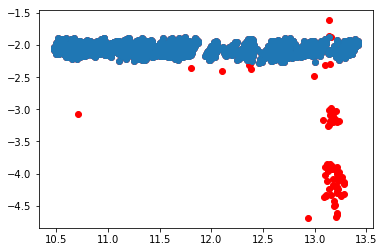

-2.07262975888 0.068914795404
-2.07012940057 0.0691363265863
There are 56 psf stars.


calibration.py:338: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 629187 but corresponding boolean dimension is 3222


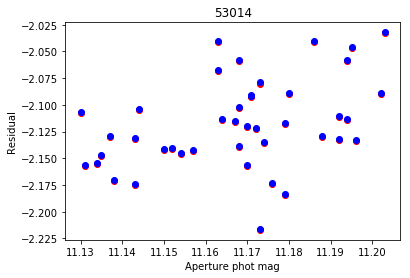

0.073 0.186
0.0203552491461 0.0378451688161


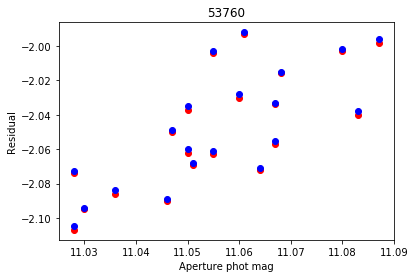

0.059 0.082
0.0168501483673 0.0236782600712


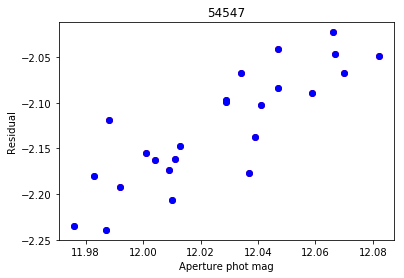

0.106 0.138
0.0298877239292 0.0391353598283


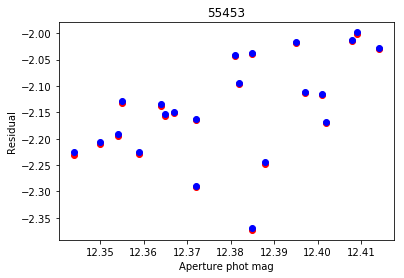

0.07 0.347
0.0202815410926 0.0859221250334


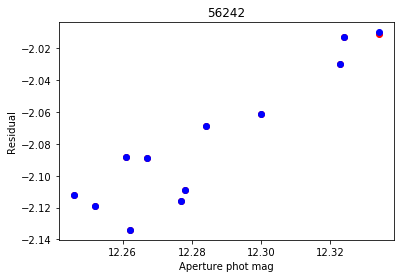

0.088 0.059
0.0284780617318 0.0185734278533


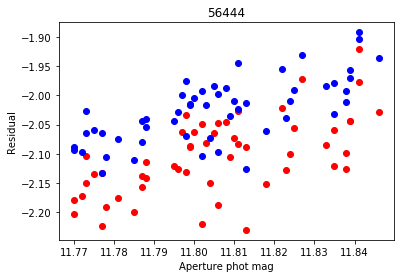

0.076 0.206
0.0217460504101 0.0429186270047


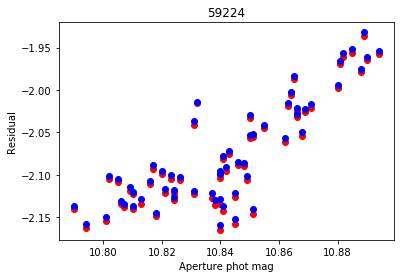

0.104 0.178
0.0265201967062 0.0423316928816


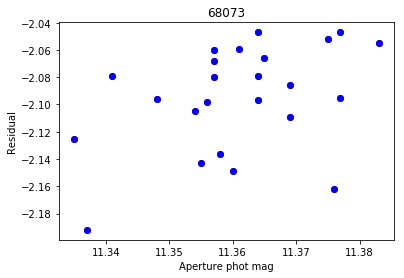

0.048 0.127
0.0122064845016 0.0350309387066


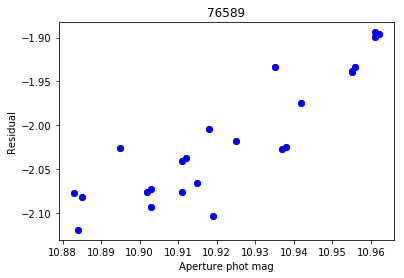

0.079 0.167
0.0254700259564 0.0484933951688


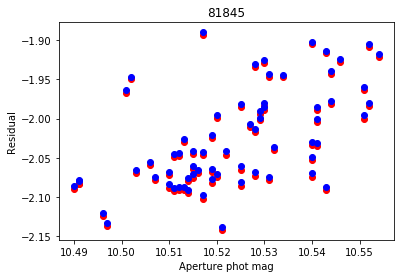

0.064 0.252
0.016041047814 0.0544278652442


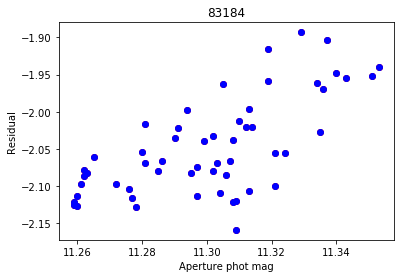

0.094 0.246
0.0255391839602 0.0511475583706


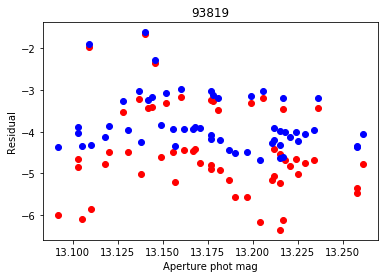

0.169 3.134
0.0439237656637 0.674597717652


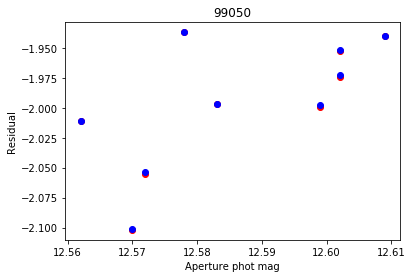

0.047 0.156
0.0160208197876 0.0429179521562


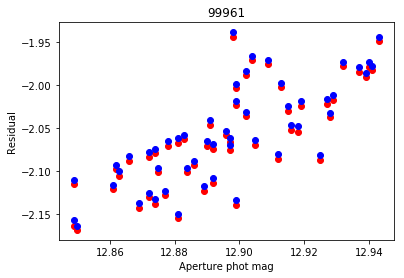

0.094 0.195
0.0251522951129 0.0412390335164


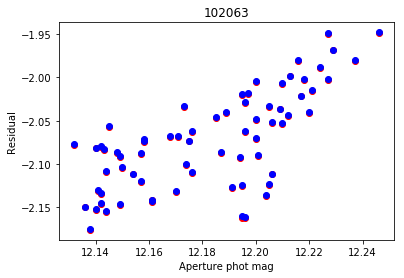

0.114 0.181
0.0302341697414 0.0408532190561


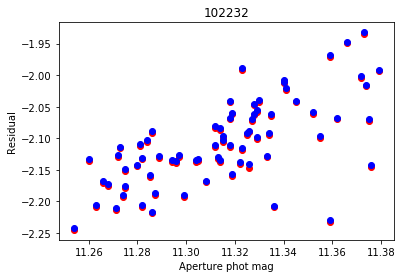

0.125 0.284
0.0322555592634 0.0516257884136


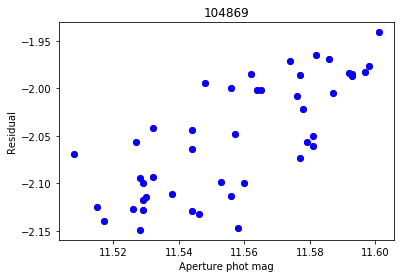

0.093 0.163
0.0257331606212 0.0444139895656


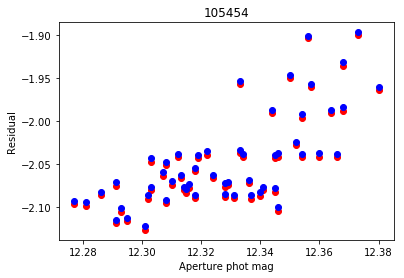

0.103 0.189
0.0254339632842 0.0393308222676


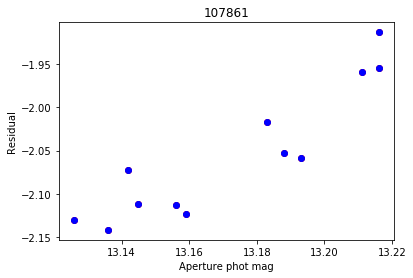

0.09 0.153
0.0311888290187 0.0473681650009


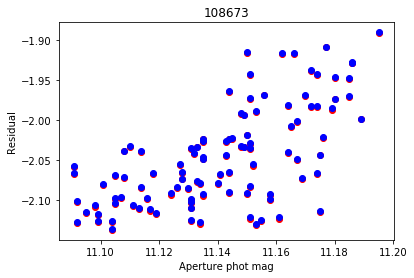

0.104 0.223
0.0265980083757 0.048683191781


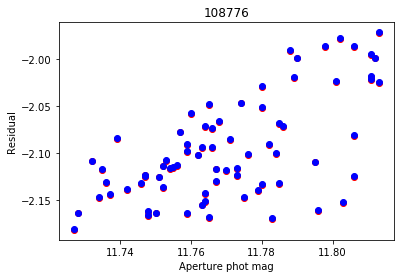

0.086 0.179
0.0230518796534 0.0437867478684


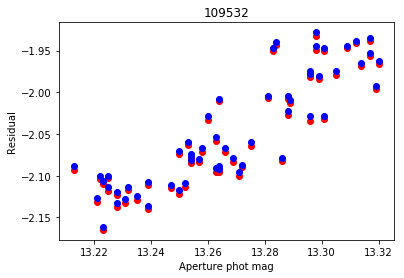

0.107 0.16
0.0302486377087 0.0417989817477


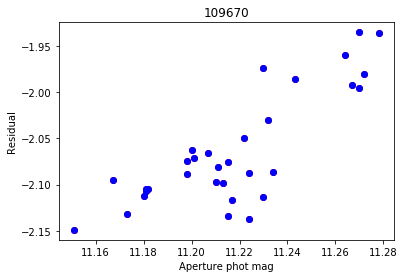

0.127 0.157
0.0326774004474 0.0388023336122


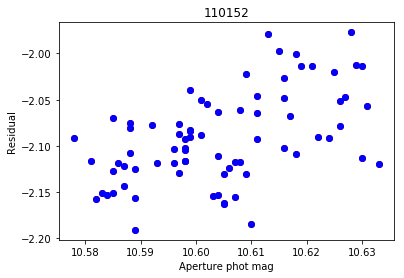

0.055 0.203
0.014312711308 0.0429339080913


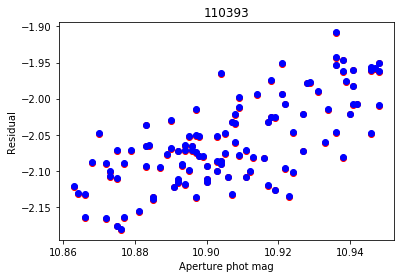

0.085 0.214
0.0230217973846 0.046377786125


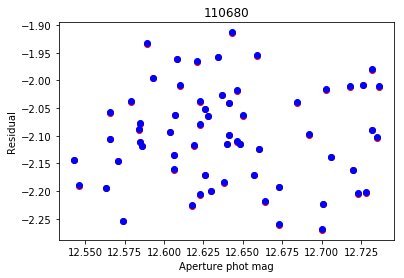

0.193 0.447
0.0521088870369 0.101131784703


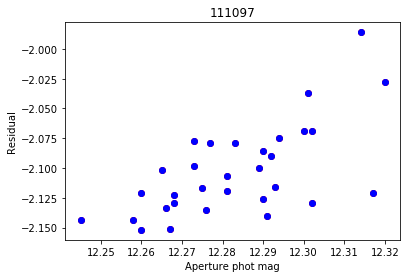

0.075 0.138
0.0180714272494 0.0294033983326


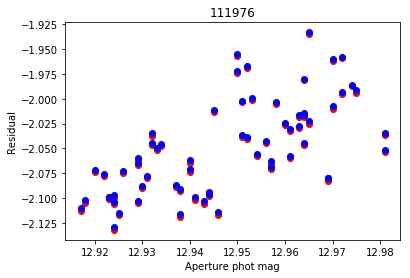

0.064 0.162
0.0177062552396 0.0381194540024


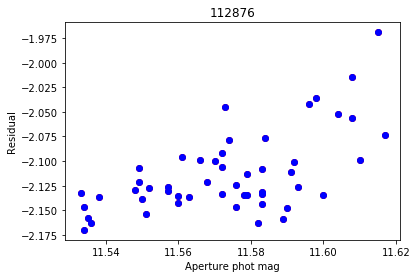

0.084 0.164
0.0224921533586 0.0324668227427


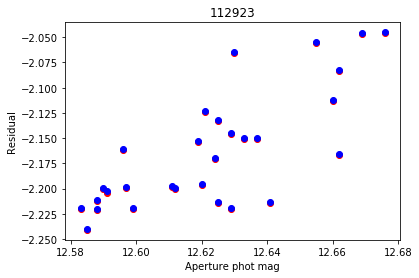

0.093 0.159
0.026902475033 0.0405021101607


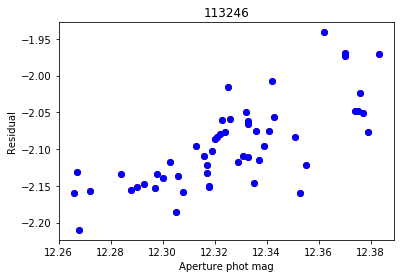

0.117 0.21
0.0299170148541 0.0407416203609


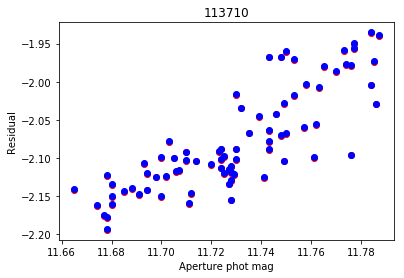

0.122 0.173
0.0321407816294 0.0438716006518


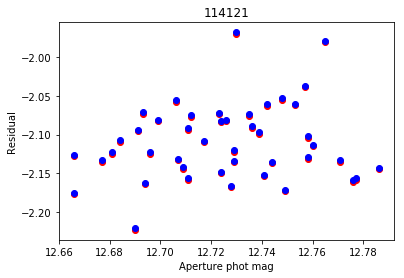

0.12 0.237
0.0304431796973 0.0531282169663


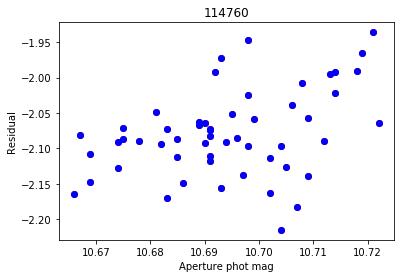

0.056 0.274
0.0142531307276 0.0556001486412


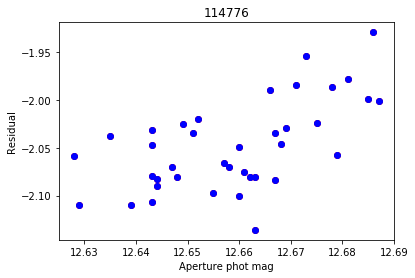

0.059 0.184
0.0155939872282 0.0391088136803


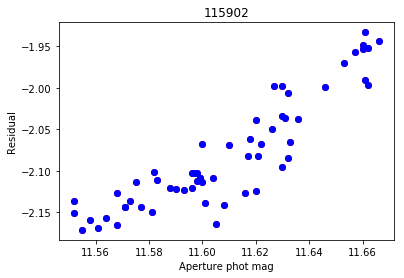

0.114 0.175
0.0319123626341 0.0404824344624


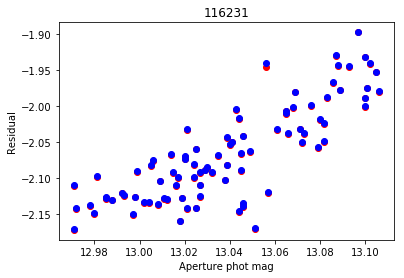

0.135 0.227
0.0367397312353 0.0417905649298


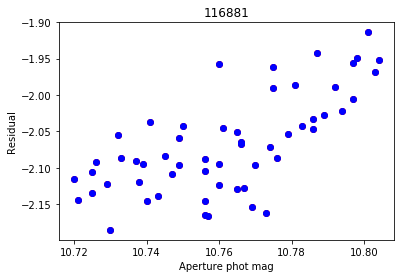

0.084 0.22
0.023430742223 0.0533668833144


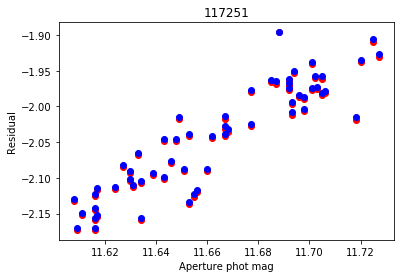

0.119 0.206
0.0342944815127 0.0456398853874


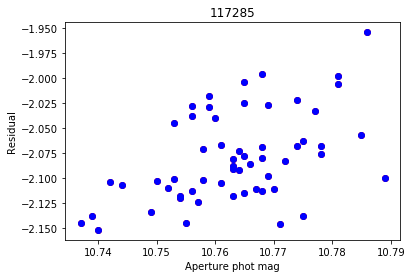

0.052 0.177
0.0116161285016 0.0400829318804


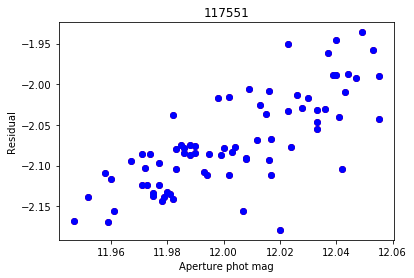

0.108 0.226
0.0280761232734 0.040790186751


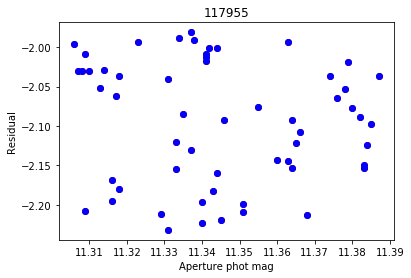

0.081 0.279
0.0242570491225 0.0826654342684


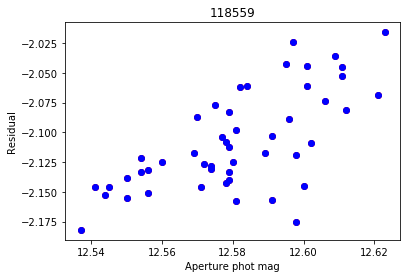

0.086 0.152
0.0214603069179 0.0309486414725


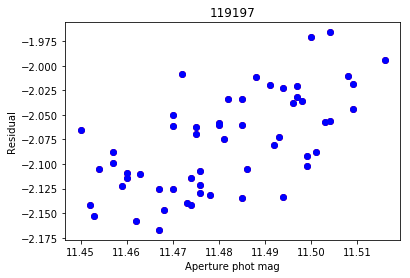

0.066 0.164
0.016990994013 0.0410456091204


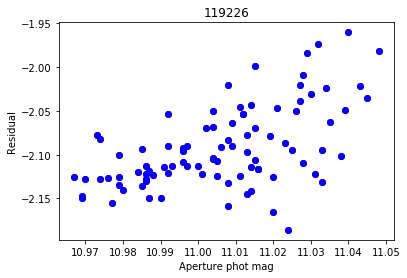

0.081 0.21
0.0202899284849 0.0387607638209


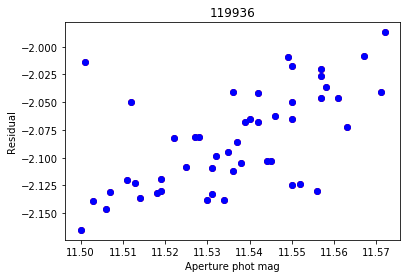

0.072 0.171
0.0189670136069 0.0362547674557


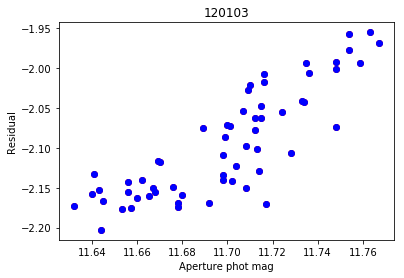

0.135 0.176
0.035036083505 0.0420258398508


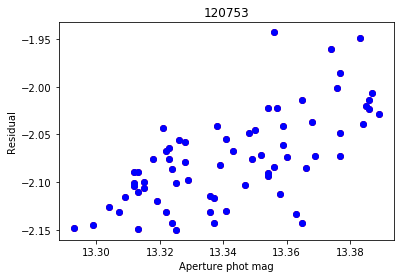

0.096 0.209
0.0253805163904 0.0372622695859


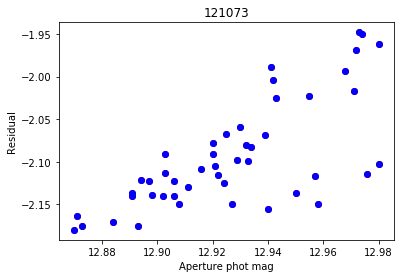

0.11 0.187
0.0304451209072 0.0461832318148


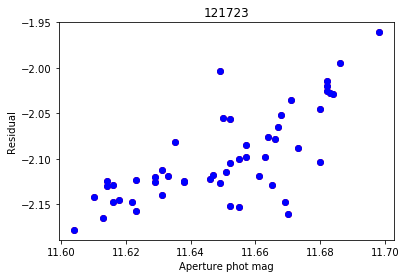

0.094 0.178
0.0239698636605 0.036245342488


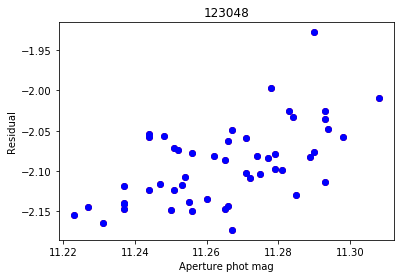

0.085 0.222
0.0203389388533 0.0399924829538


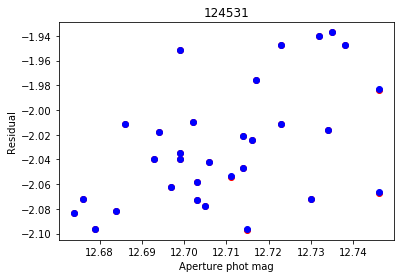

0.072 0.162
0.01957424033 0.0411534778712


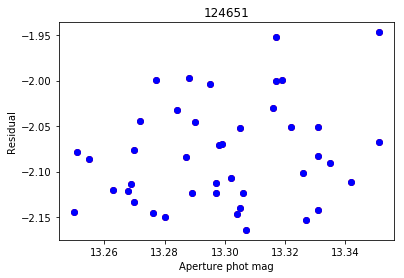

0.101 0.211
0.0265018289704 0.055868021512


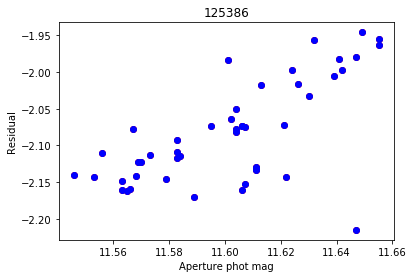

0.109 0.277
0.029603965085 0.0535989331191


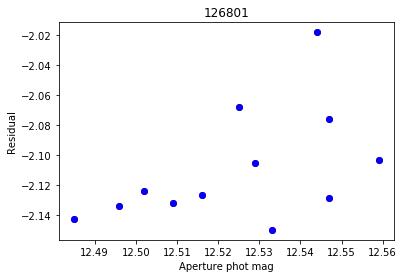

0.074 0.121
0.0221108319357 0.0318550318718


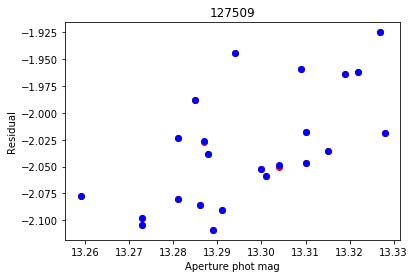

0.069 0.16
0.0180734690515 0.0438366101928


/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/numpy/core/numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


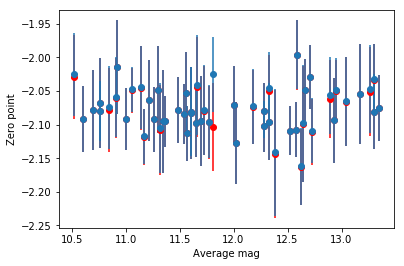

-2.07786066847 0.0308282419811
-2.07560113263 0.0315925394057


In [4]:
I1zp, I1zper = calibration.find_zp_bcds('I1', data_dir=folder)

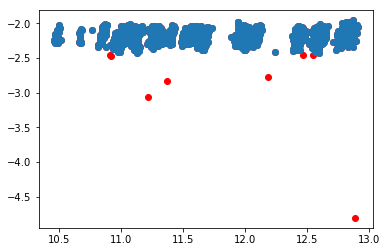

-2.20354287164 0.0982213022454
-2.19188872028 0.0865169542226
There are 36 psf stars.


calibration.py:338: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 386859 but corresponding boolean dimension is 1985
  x = obs_num[names == star]


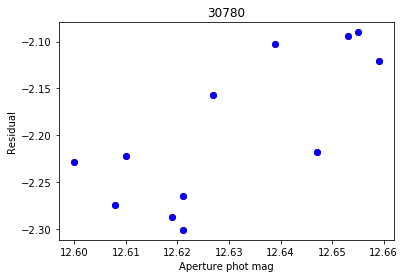

0.059 0.18
0.0192373695938 0.0630125097809


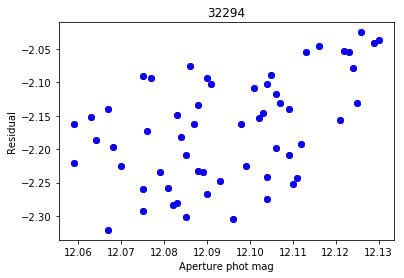

0.071 0.249
0.0190478775958 0.0718347476854


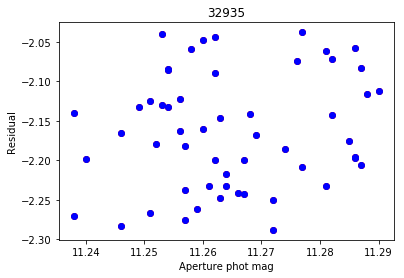

0.052 0.267
0.0138588811636 0.0709082392608


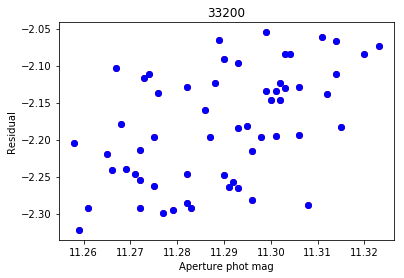

0.065 0.243
0.0163904862054 0.0686212094938


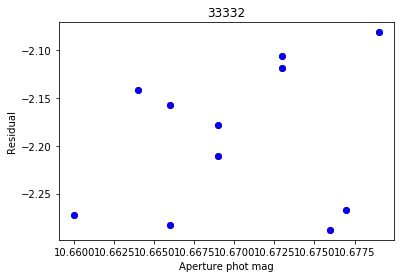

0.019 0.204
0.00566998768346 0.0720684935918


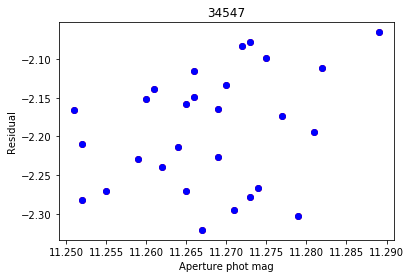

0.038 0.237
0.00928921637256 0.0719485714853


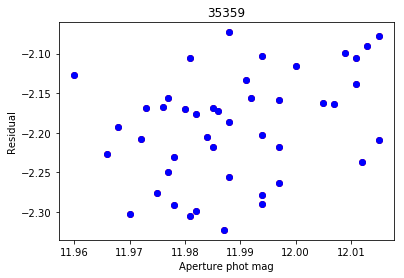

0.055 0.249
0.0141605865254 0.0641910404139


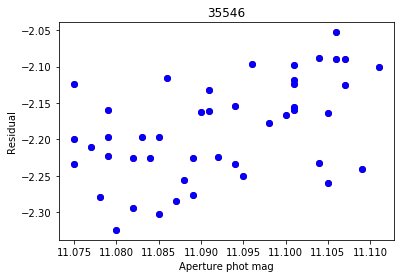

0.036 0.245
0.0106853077854 0.0622126421196


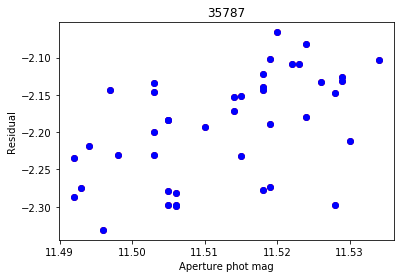

0.042 0.241
0.0117173824788 0.0654940278733


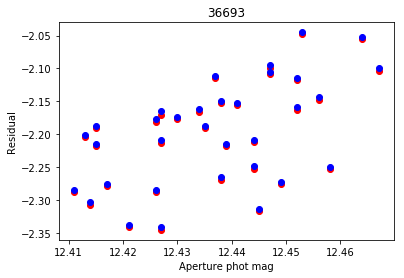

0.056 0.27
0.0152451048911 0.0709976654772


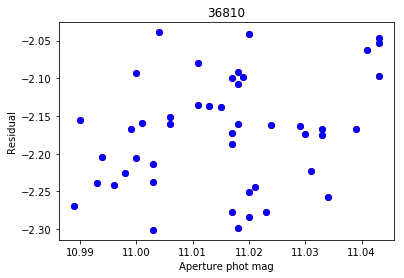

0.054 0.273
0.0148339422006 0.0696723495721


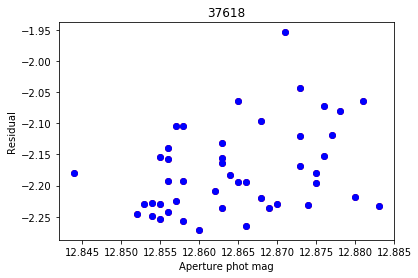

0.039 0.306
0.00917277965387 0.0660739403658


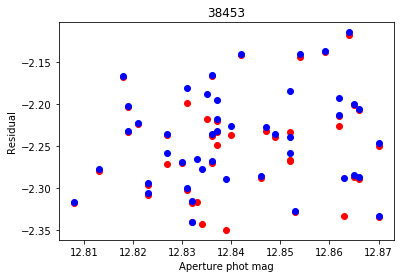

0.062 0.224
0.016589121746 0.0552769150242


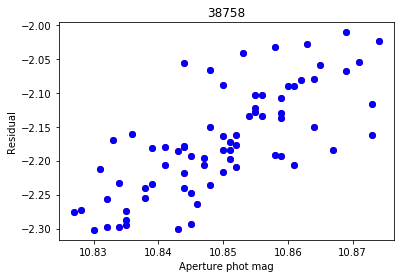

0.047 0.264
0.0118047701793 0.0689445209528


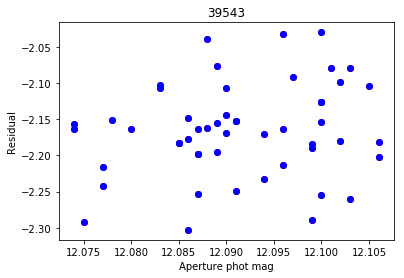

0.032 0.262
0.00872471906705 0.0627790533123


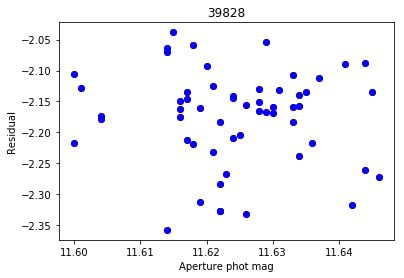

0.046 0.319
0.011107530425 0.0776382222792


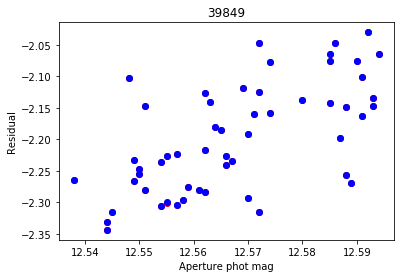

0.056 0.269
0.0157624360292 0.0763776467597


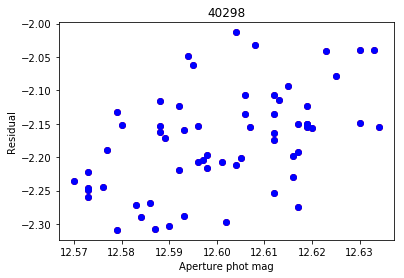

0.064 0.282
0.0169519505199 0.0680918554633


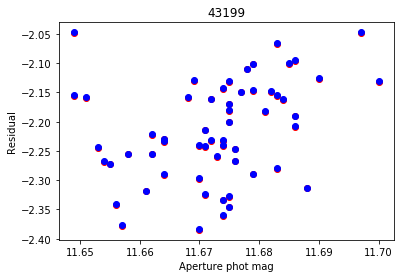

0.051 0.358
0.0113160729818 0.0812839227639


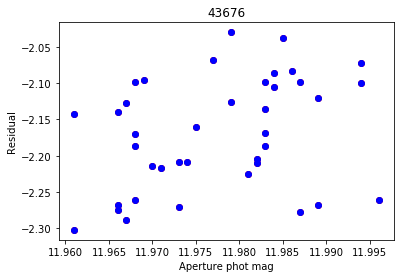

0.035 0.256
0.00943972887653 0.0734018775949


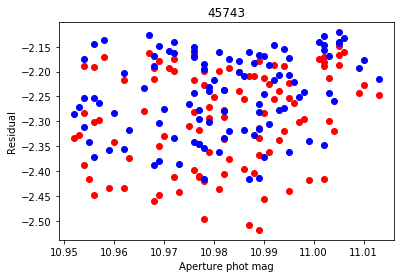

0.061 0.308
0.0152751170309 0.0783938936188


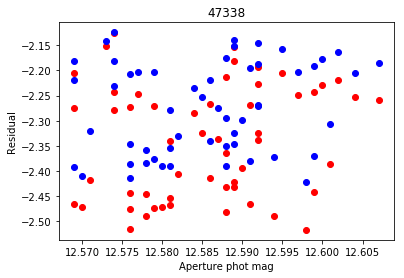

0.038 0.322
0.00983702936747 0.0888702623231


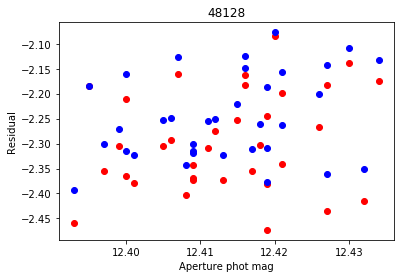

0.041 0.3
0.0106861890624 0.0831869585284


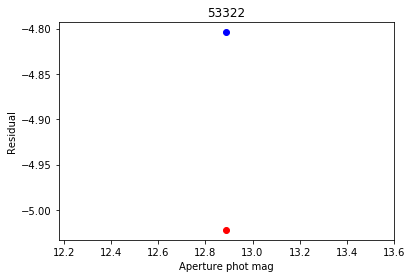

0.0 0.0
0.0 0.0


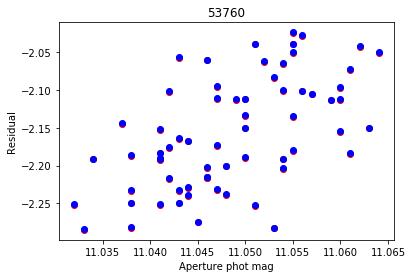

0.032 0.256
0.00782122737383 0.0685950711566


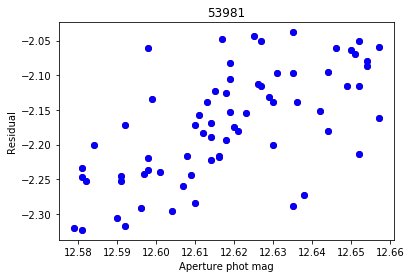

0.078 0.266
0.0217348788113 0.0670754104798


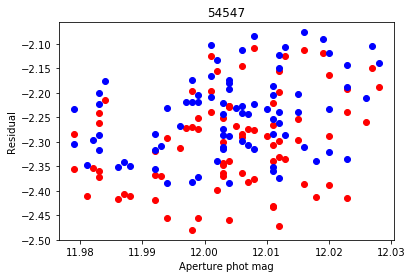

0.049 0.296
0.012004089127 0.0782514150071


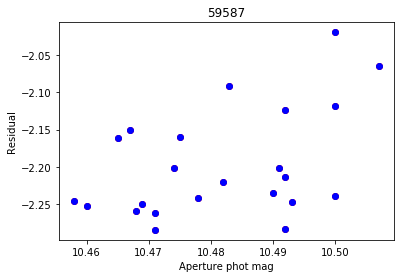

0.049 0.255
0.0139427671624 0.0658085669637


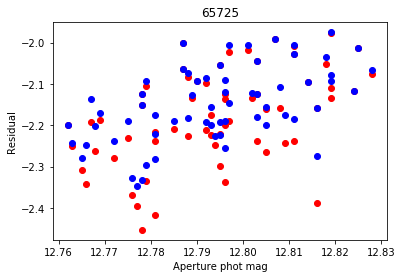

0.066 0.337
0.0169273490952 0.0822982274191


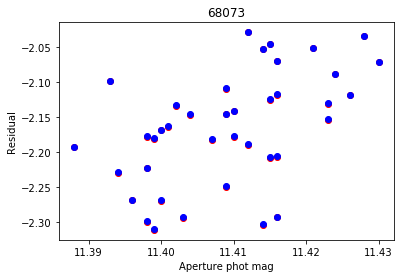

0.042 0.276
0.010397617691 0.0750214170604


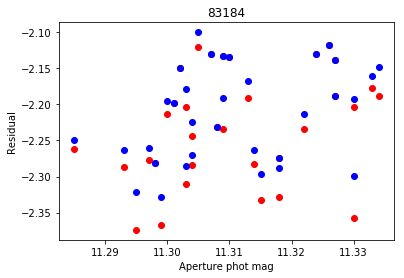

0.049 0.224
0.0126155267489 0.0623025144419


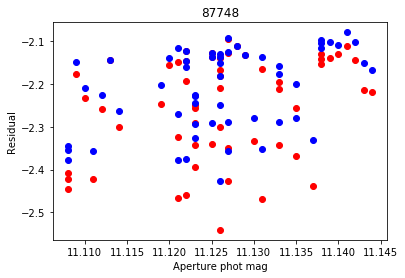

0.036 0.333
0.00937986268447 0.0917207367975


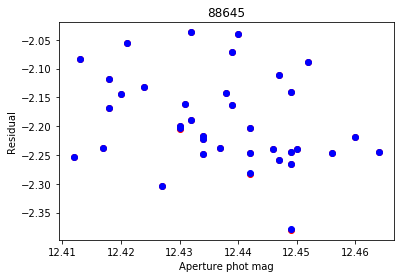

0.052 0.359
0.0130594527474 0.0823122384697


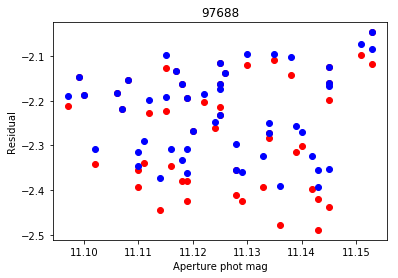

0.056 0.335
0.0146740046653 0.0956827506584


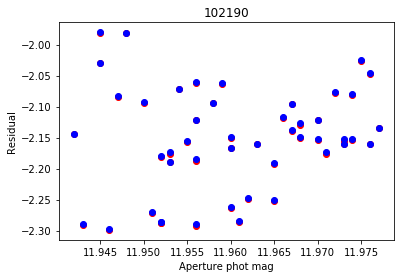

0.035 0.321
0.0100103160913 0.0814374647256


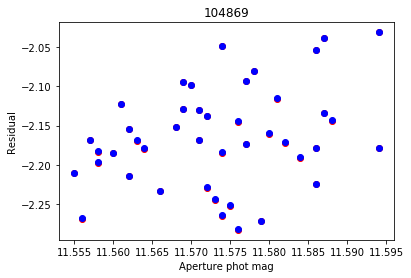

0.039 0.236
0.0103598843572 0.0606174646006


/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/numpy/core/numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


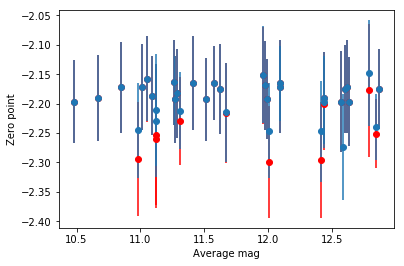

-2.19843040507 0.0398879545639
-2.19233908686 0.0300040741403


In [5]:
I2zp, I2zper = calibration.find_zp_bcds('I2', data_dir=folder)

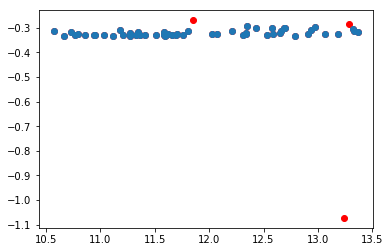

-0.321611111111 0.0105082272295
-0.320981132075 0.0106708747781
There are 57 psf stars.


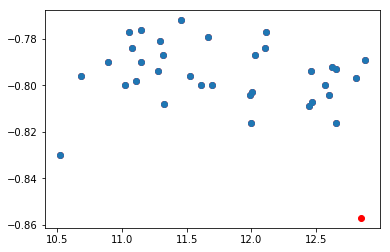

-0.812485714286 0.0335392064209
-0.795 0.0126235074831
There are 37 psf stars.


In [4]:
I1_mosaic_zp, I1_mosaic_zper = calibration.find_zp_deep_mosaic(target, 'I1', data_dir=folder)
I2_mosaic_zp, I2_mosaic_zper = calibration.find_zp_deep_mosaic(target, 'I2', data_dir=folder)

In [3]:
calibration.apply_calibration_bcds(target, 'I1', -2.072, data_dir=folder)
calibration.apply_calibration_bcds(target, 'I2', -2.182, data_dir=folder)


NameError: global name 'alf' is not defined

In [3]:
calibration.apply_calibration_deep_mosaic(target, 'I1', -0.32, data_dir=folder)
calibration.apply_calibration_deep_mosaic(target, 'I2', -0.80, data_dir=folder)

## MIR catalog

In [4]:
center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
analysis_routines.merge_opt_deep_catalogs(target, optical_dir, folder, cluster_coord=[center_ra, center_dec])

Reading optical catalog for NGC3201...
Finished reading optical catalog.
Reading MIR catalog for NGC3201...


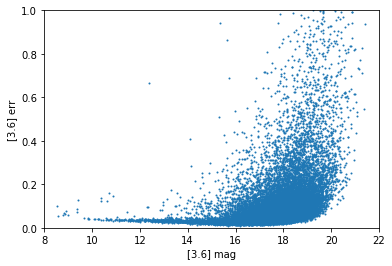

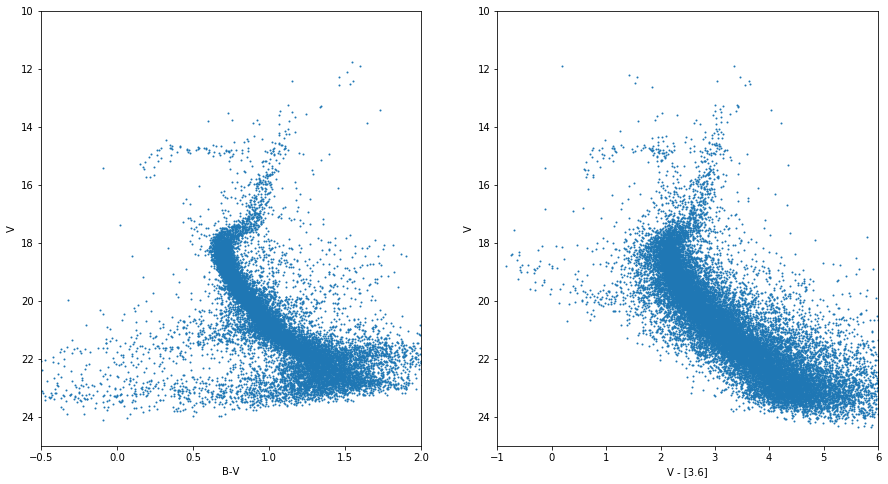

In [5]:
#center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
# change to read merged catalog
catalog_data = analysis_routines.read_merged_catalog(folder)

thres = 300
thres2 = 150
dist = catalog_data['rad_dist']
colorBV = catalog_data['B'][(dist > thres2) & (dist < thres)] - catalog_data['V'][(dist > thres2) & (dist < thres)]
Vmag = catalog_data['V'][(dist > thres2) & (dist < thres)]
colorVIR = catalog_data['V'][dist > thres2] - catalog_data['3.6'][dist > thres2]
mag = catalog_data['V'][dist > thres2]
magIR = catalog_data['3.6'][dist > thres2]
err = catalog_data['3.6er'][dist > thres2]

fig = mp.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(magIR, err, s=1, edgecolor=None)
ax1.set_ylim((0,1.0))
ax1.set_xlim((8,22))
ax1.set_xlabel('[3.6] mag')
ax1.set_ylabel('[3.6] err')

good_mag = mag[err < 0.2]
good_color = colorVIR[err < 0.2]

fig2 = mp.figure(figsize=(15,8))
ax2 = fig2.add_subplot(121)
ax2.scatter(colorBV, Vmag, s=1, edgecolor=None)
ax2.set_ylim((25,10))
ax2.set_xlim((-0.5,2))
ax2.set_xlabel('B-V')
ax2.set_ylabel('V')
ax3 = fig2.add_subplot(122)
ax3.scatter(good_color, good_mag, s=1, edgecolor=None)
#ax3.hist2d(good_color, good_mag)
ax3.set_ylim((25,10))
ax3.set_xlim((-1,6))
ax3.set_xlabel('V - [3.6]')
ax3.set_ylabel('V')
mp.savefig(folder+target+'cmd.eps', format='eps')

# Variable stars

In [ ]:
# Find all stars identified as possible variables in optical catalog and list them in PeterIDs.txt

center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
optical.find_variables_fnl(optical_dir, target, center_ra, center_dec, data_dir=folder)

## First check on RRL PL relation

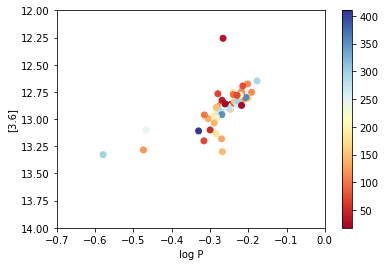

In [8]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables-new.txt', dtype=dtype1, usecols=(0,1,2))

dtype1 = np.dtype([('star', 'S10'), ('dao', int)])
dao_ids = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,1))

catalog_data = analysis_routines.read_merged_catalog(folder)

mag = np.zeros(len(data['id']))
dist = np.zeros(len(data['id']))

for ind, star in enumerate(data['id']):
    dao_id = dao_ids['dao'][dao_ids['star'] == star]
    if len(dao_id) == 0: continue
    m = catalog_data['3.6'][catalog_data['id'] == dao_id]  
    d = catalog_data['rad_dist'][catalog_data['id'] == dao_id]
    if m < 50: 
        mag[ind] = m
        dist[ind] = d
    if m > 50: 
        mag[ind] = np.nan
        dist[ind] = np.nan

cm = mp.cm.get_cmap('RdYlBu')    
mp.scatter(np.log10(data['new_period']), mag, c=dist, cmap=cm) 
mp.colorbar()
mp.ylim((14, 12))
mp.xlim((-0.7, 0))
mp.xlabel('log P')
mp.ylabel('[3.6]')
mp.savefig(target+'pl.eps', format='eps')

##  Generate MIR light curves matching optical ID numbers  

In [ ]:
dtype1 = np.dtype([('star', 'S10'), ('dao', int)])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,1))

lightcurves.make_lcv(['I1', 'I2'], data['star'], data['dao'], data_dir=folder)

#### Phase MIR light curves

In [3]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables-new.txt', dtype=dtype1, usecols=(0,1,2))

for ind, lcv in enumerate(data['id']):
    lcv_file = folder+'lcvs/mir/'+lcv+'.lcv'
    try:
        lightcurves.phase_lcv(lcv_file, data['new_period'][ind], 0, bin=1)
    except:
        print lcv +' not found.'

V7 not found.
V14 not found.
V23 not found.
V27 not found.
V30 not found.
V38 not found.
V46 not found.
V52 not found.
V53 not found.
V54 not found.
V55 not found.
V60 not found.
V61 not found.
V62 not found.
V63 not found.
V64 not found.
V66 not found.
V69 not found.
V72 not found.
V77 not found.
V84 not found.
V87 not found.
V88 not found.
V89 not found.
V91 not found.
V93 not found.
V96 not found.


#### Create figure with all bands phased together

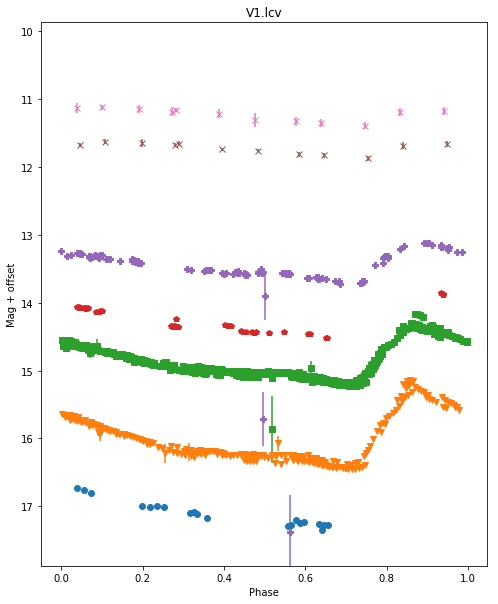

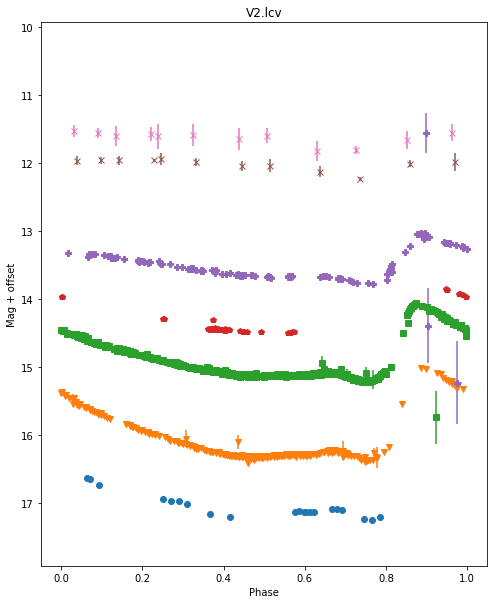

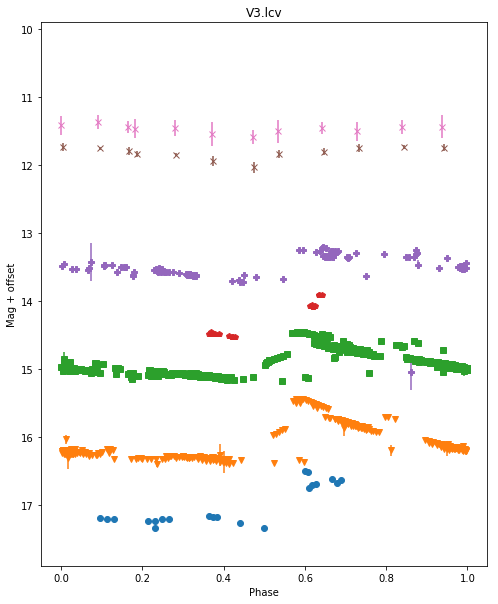

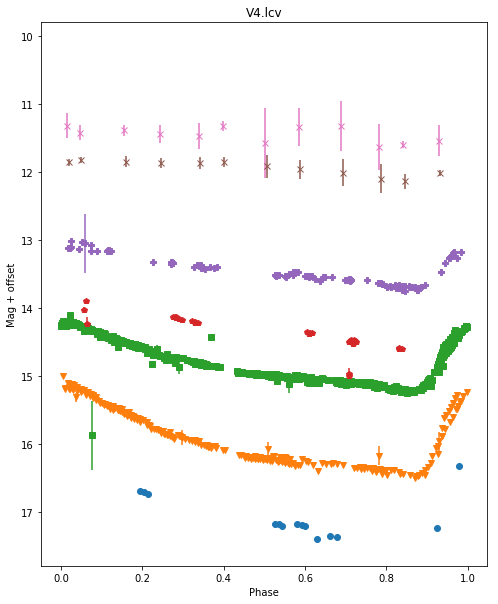

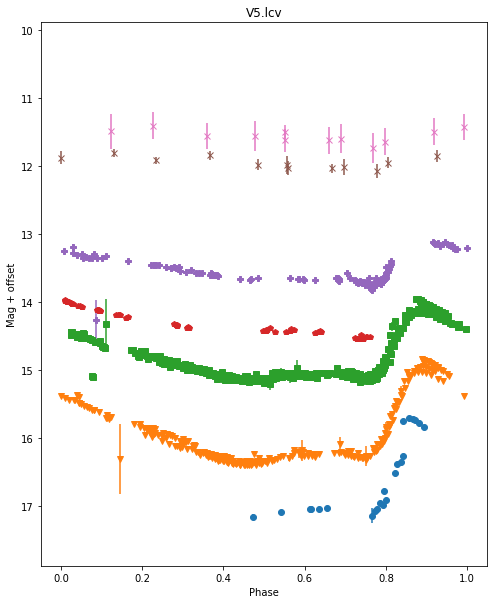

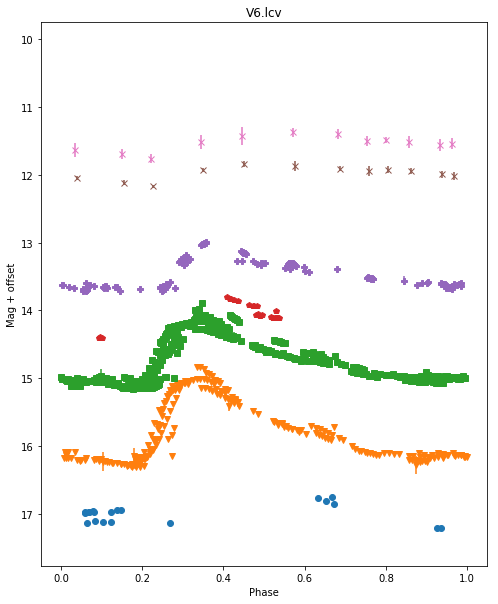

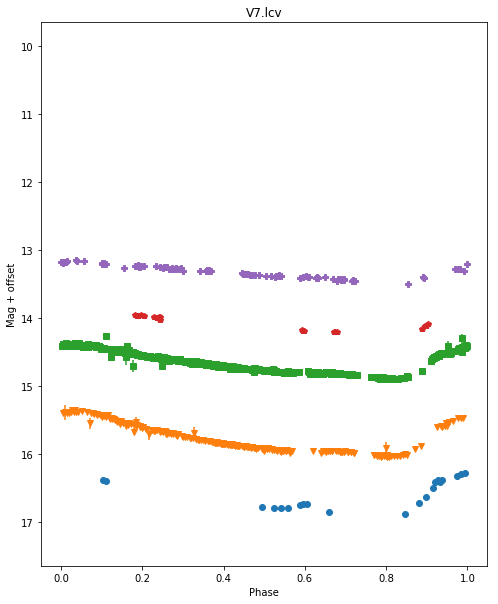

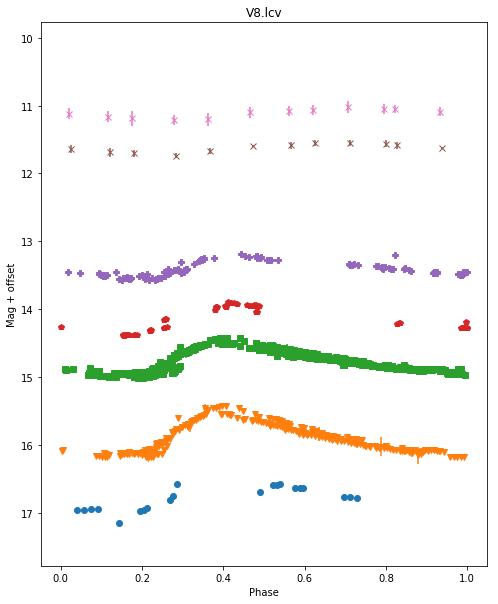

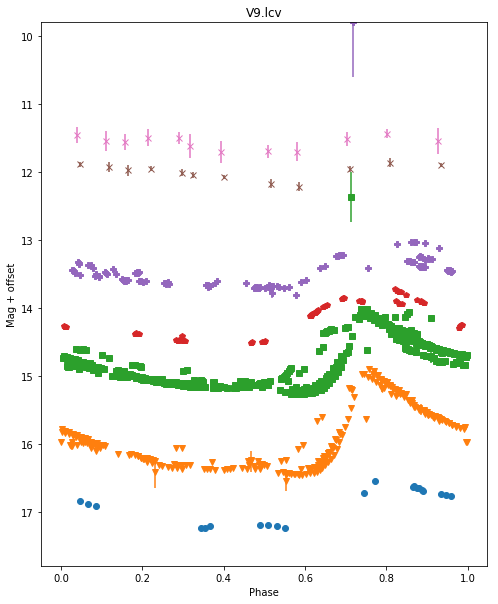

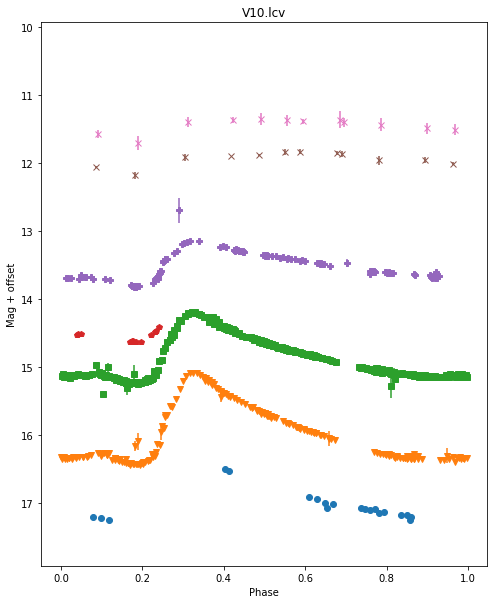

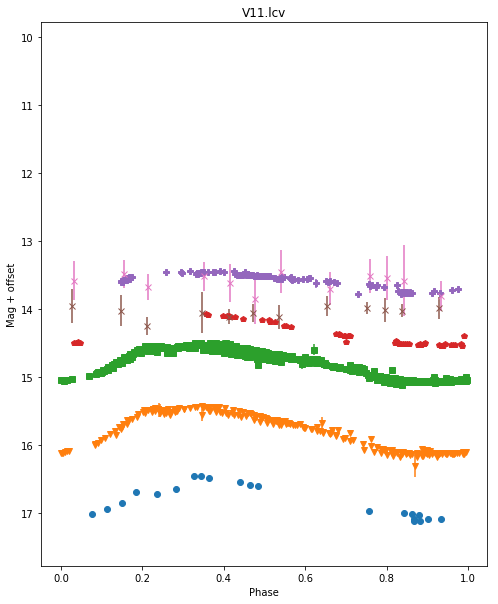

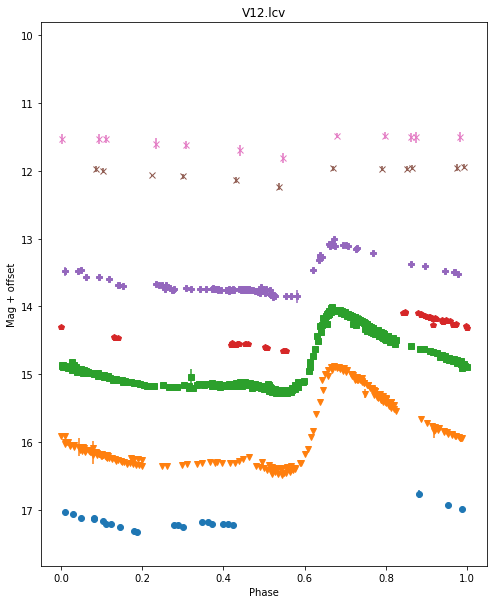

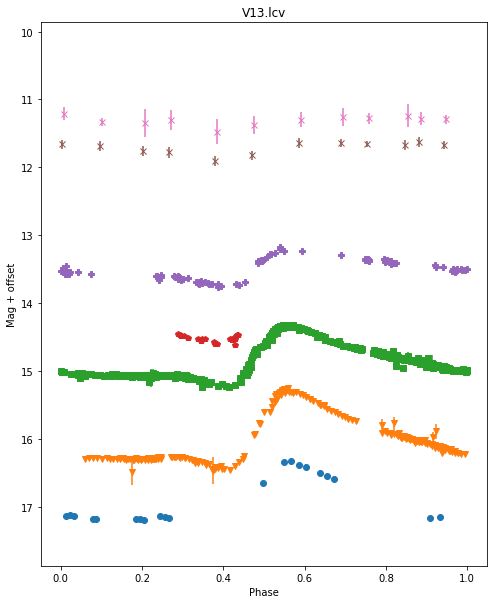

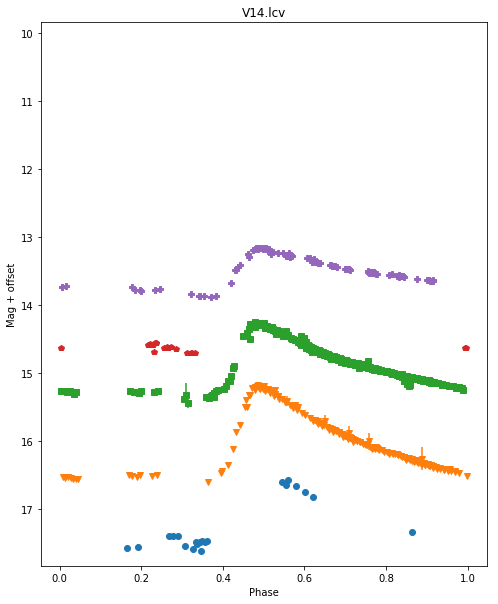

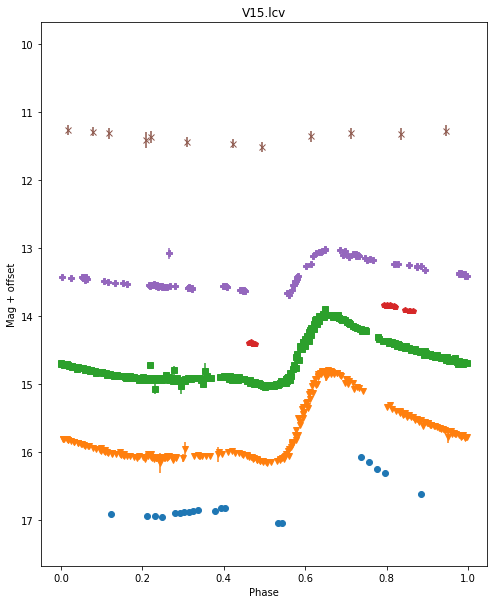

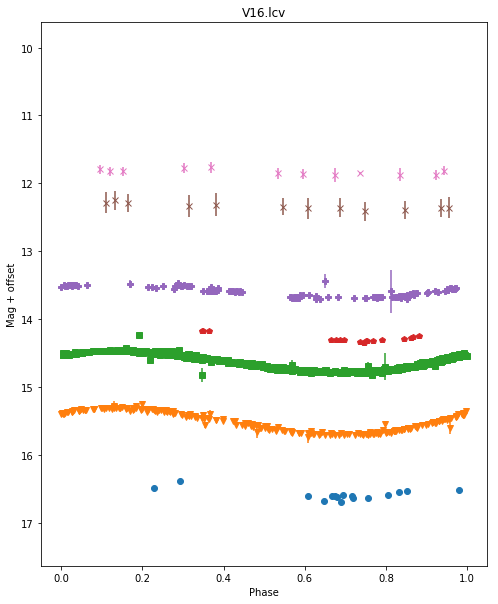

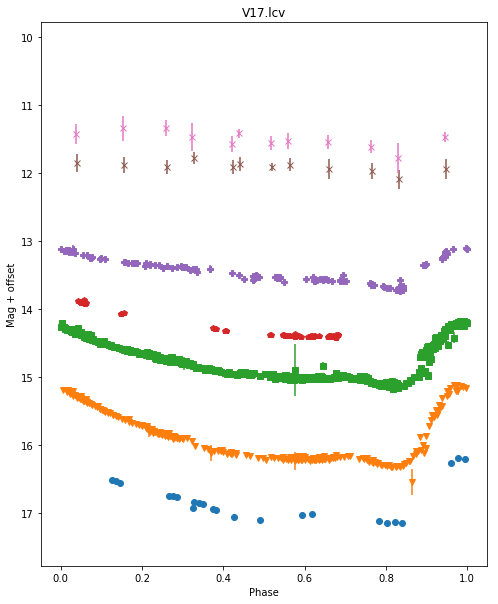

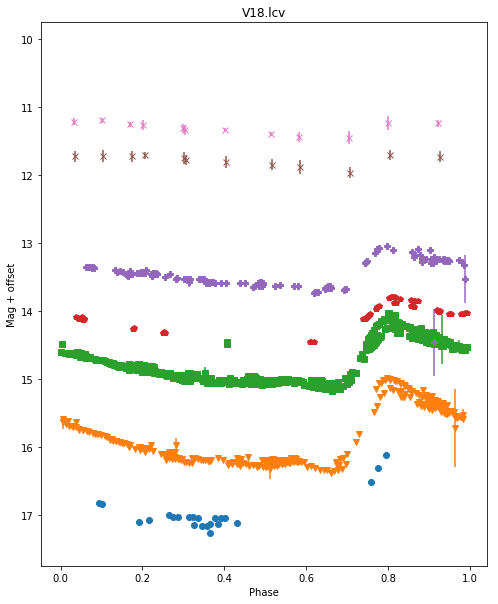

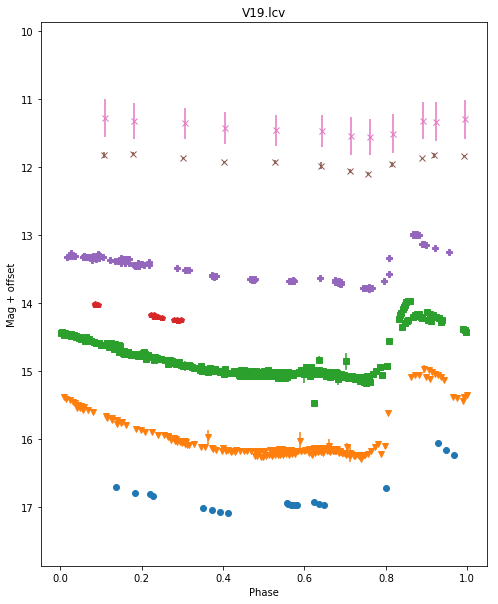

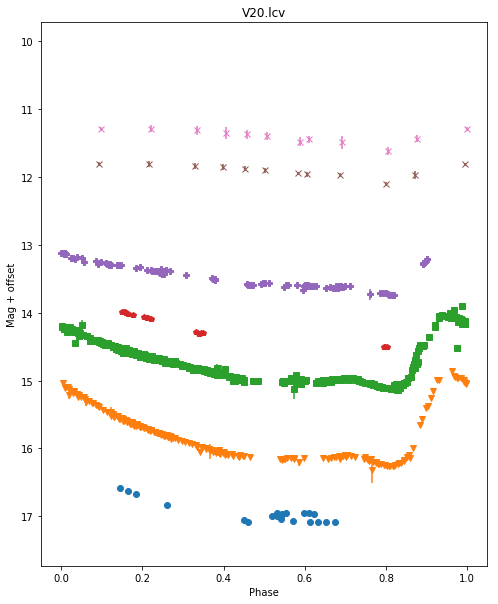

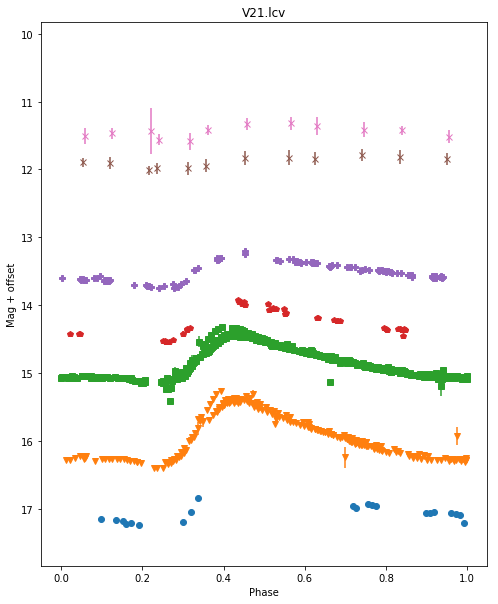

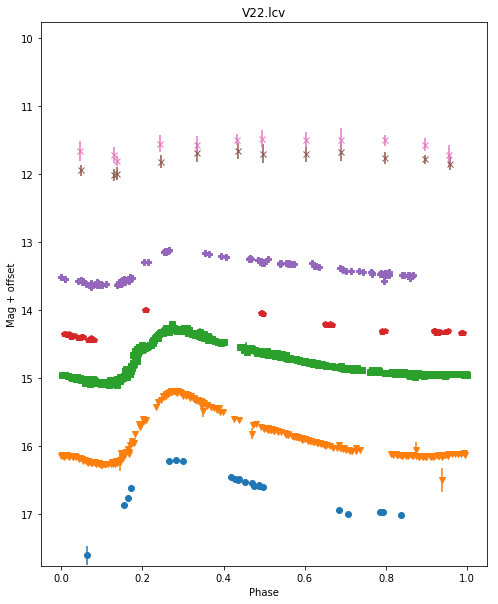

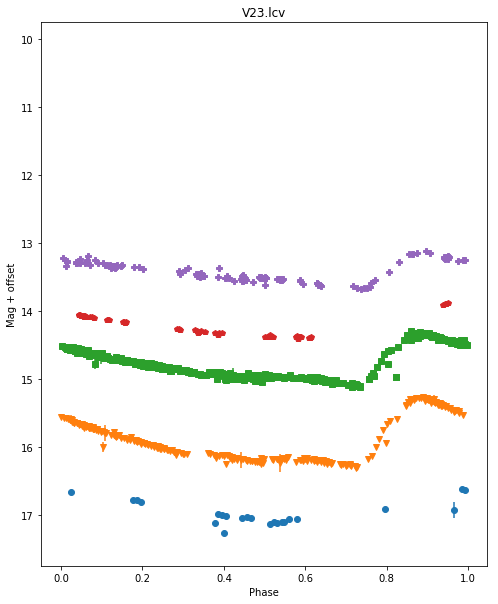

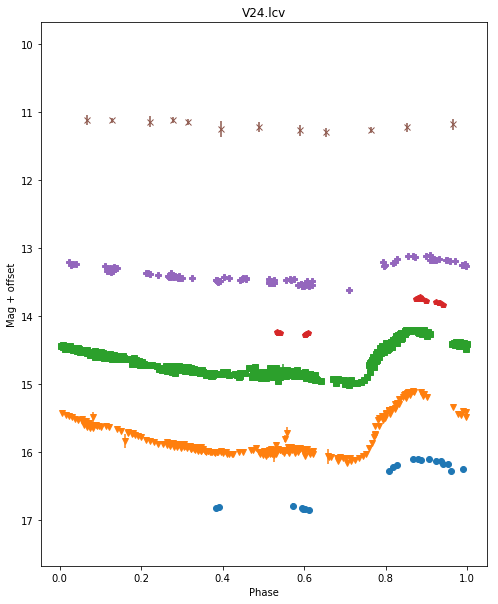

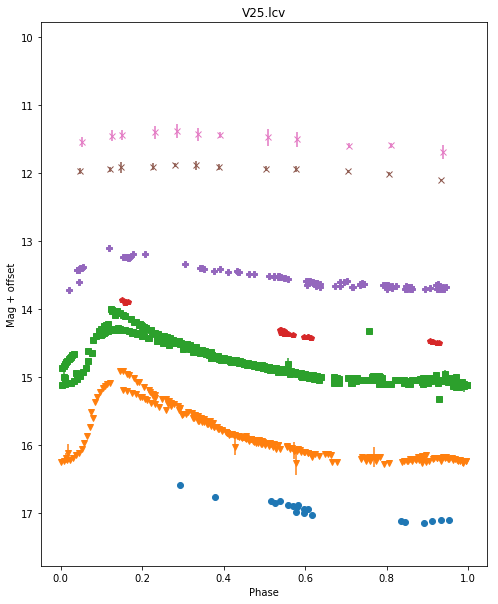

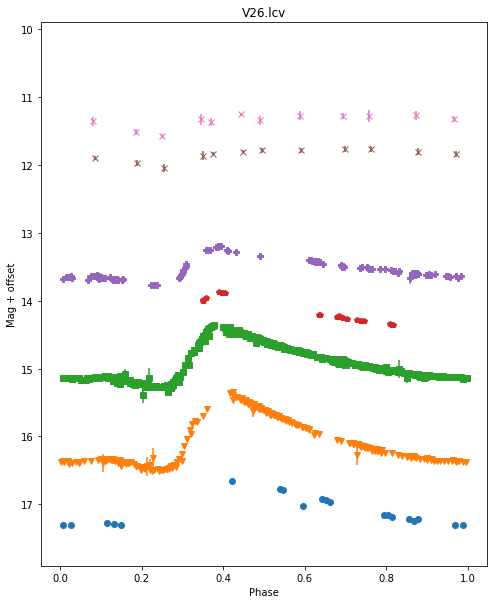

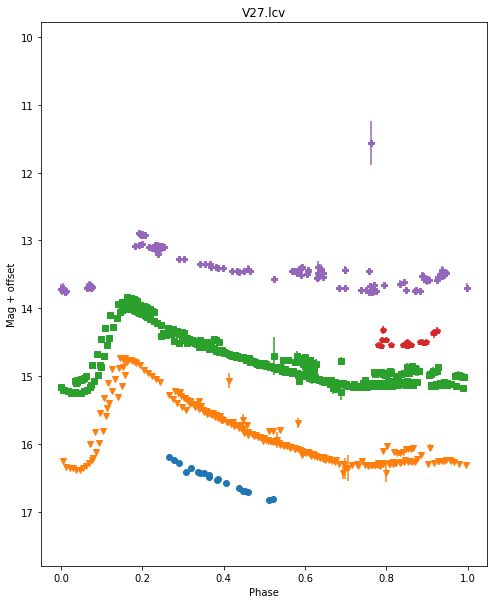

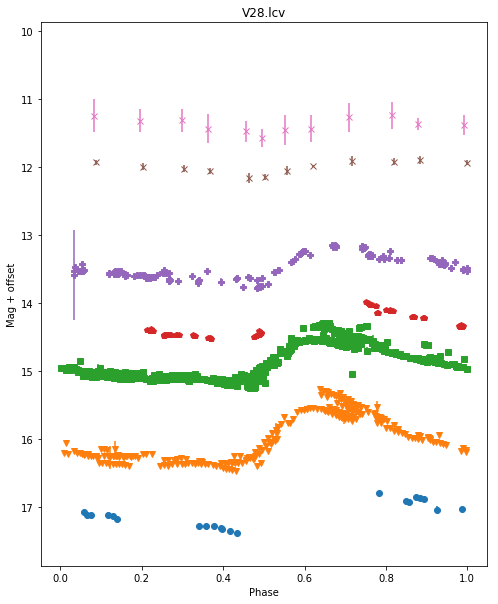

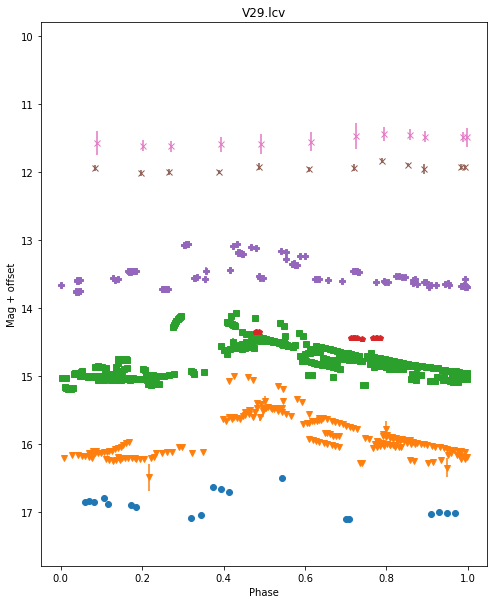

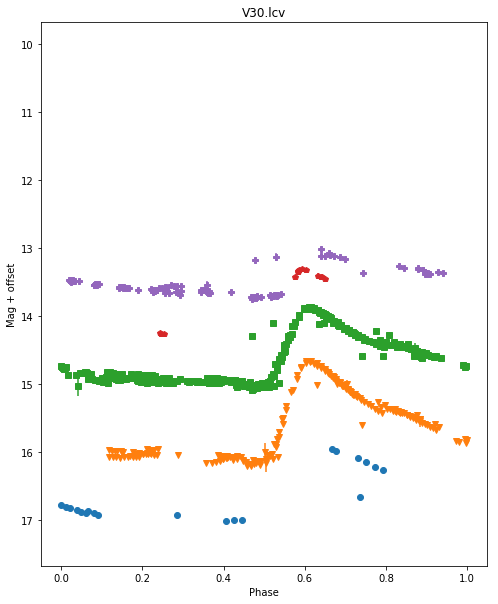

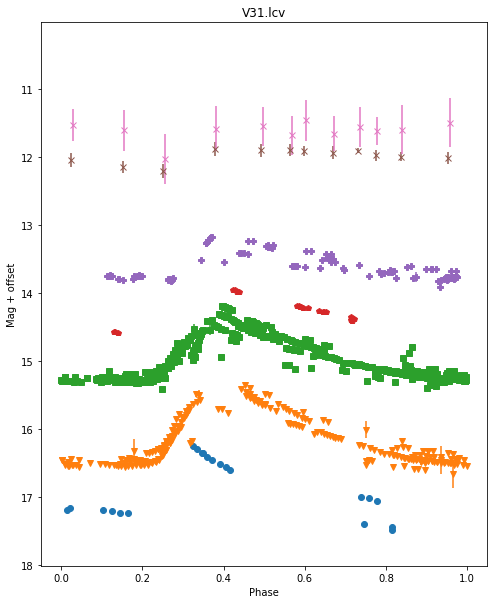

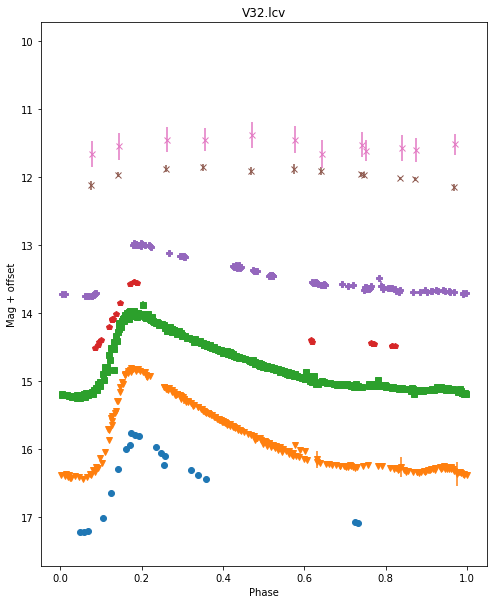

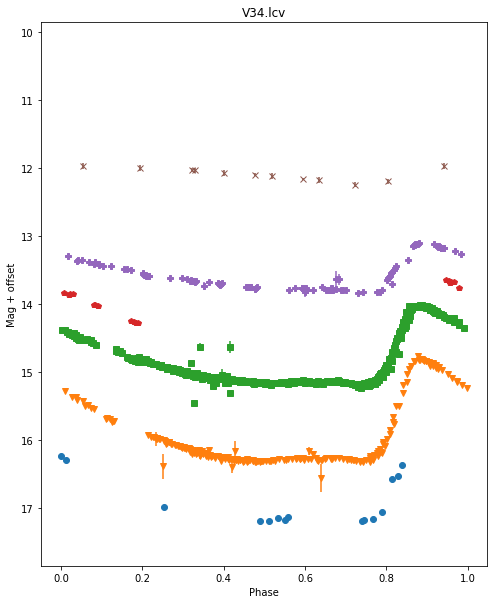

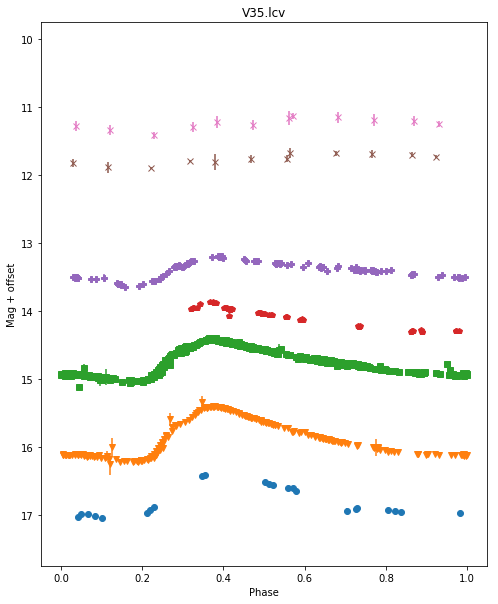

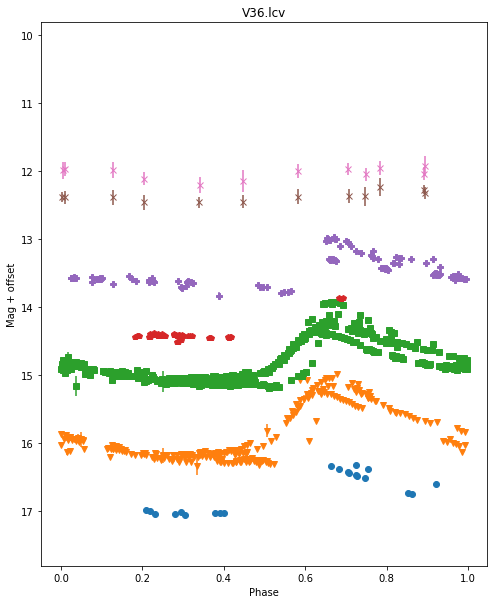

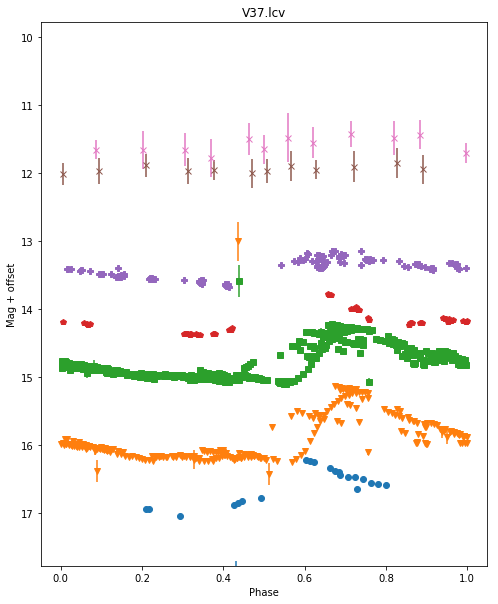

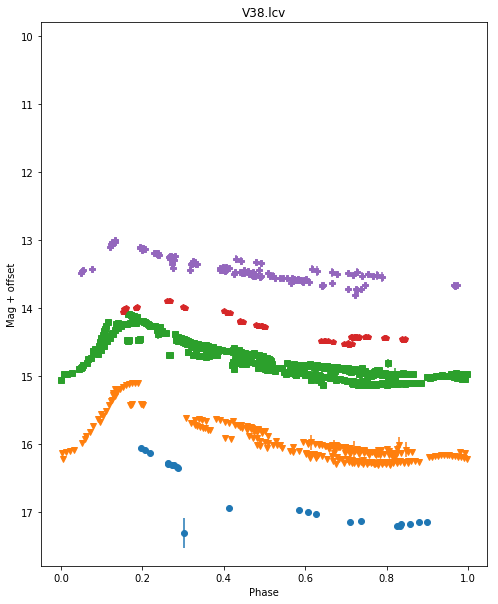

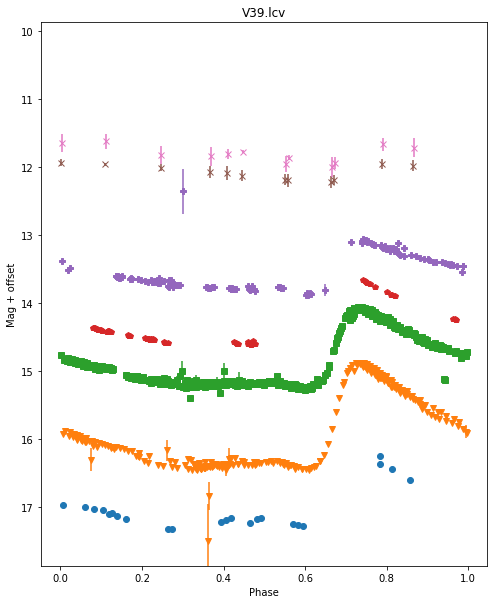

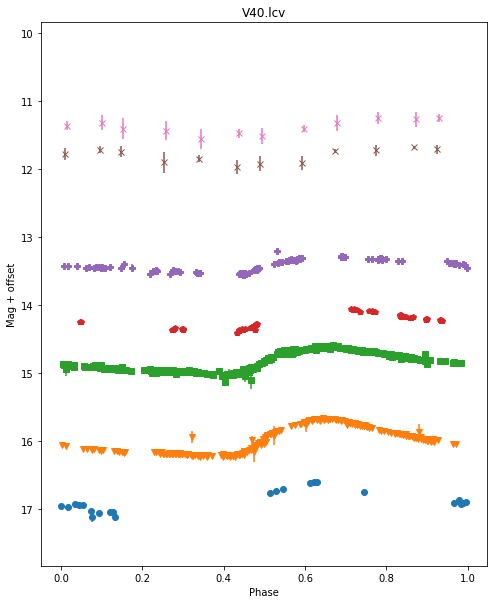

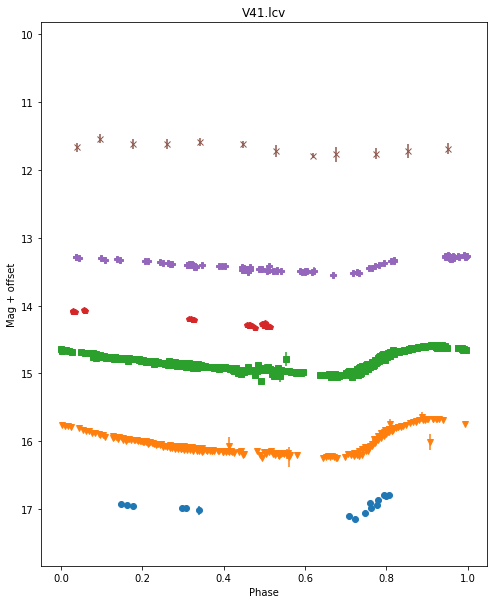

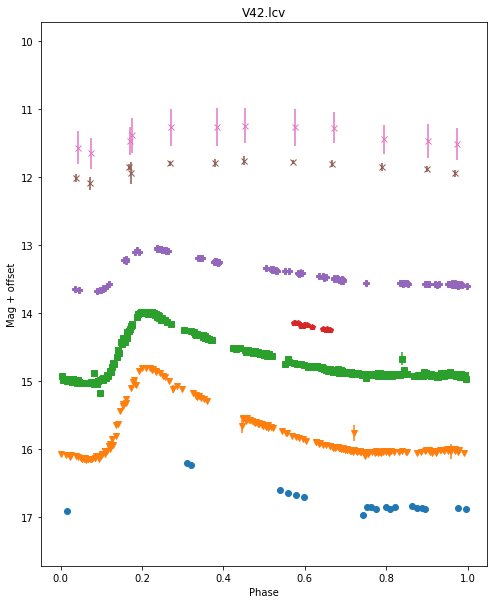

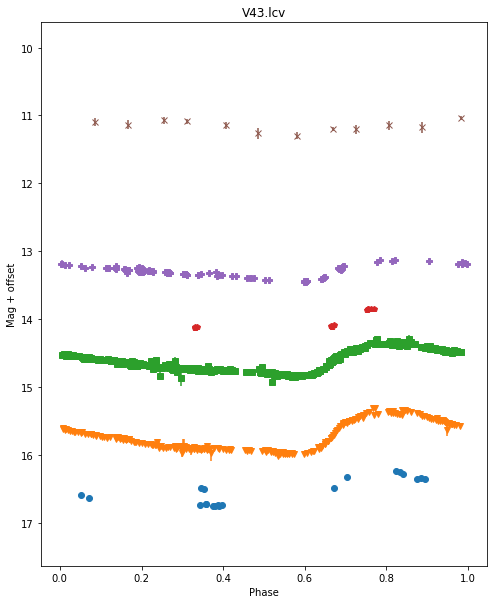

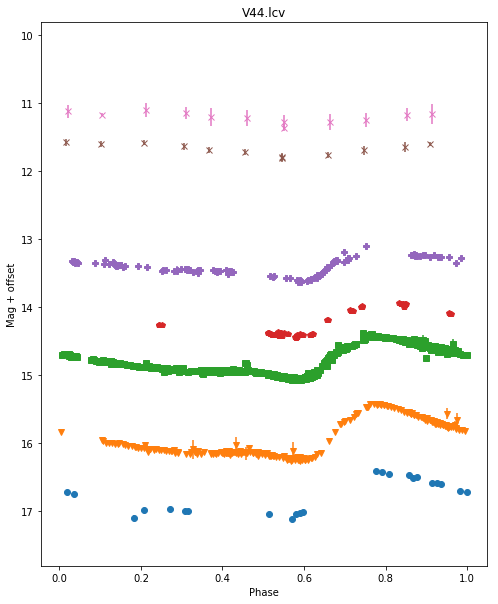

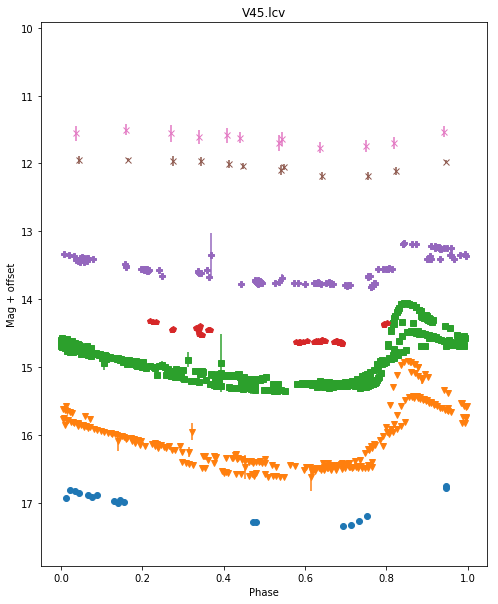

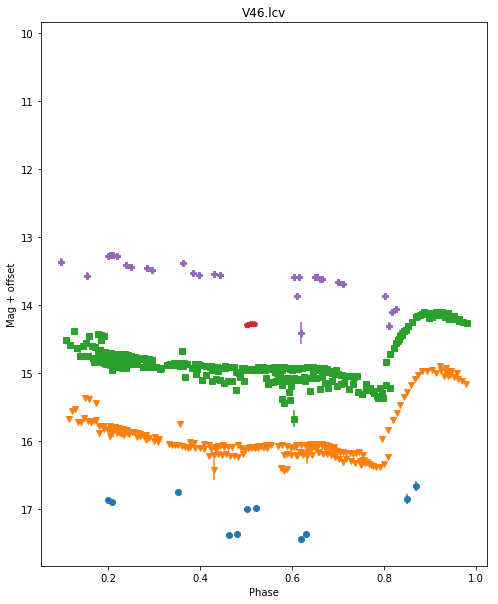

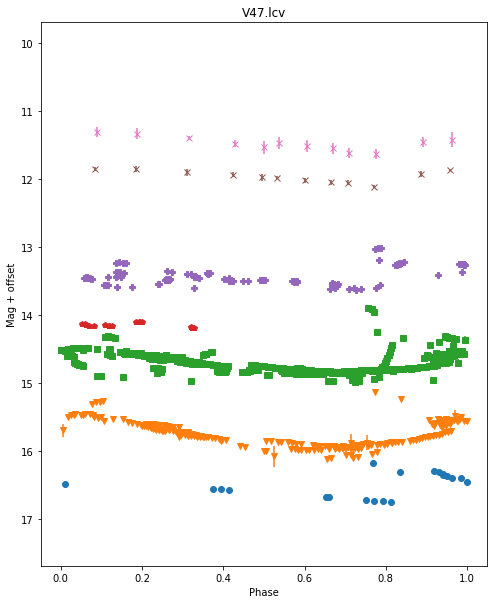

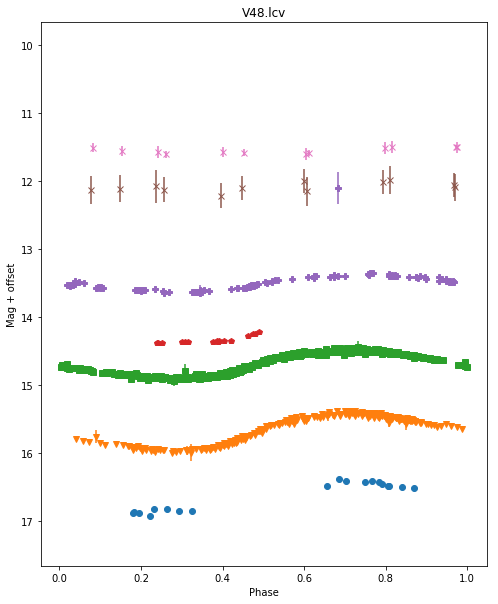

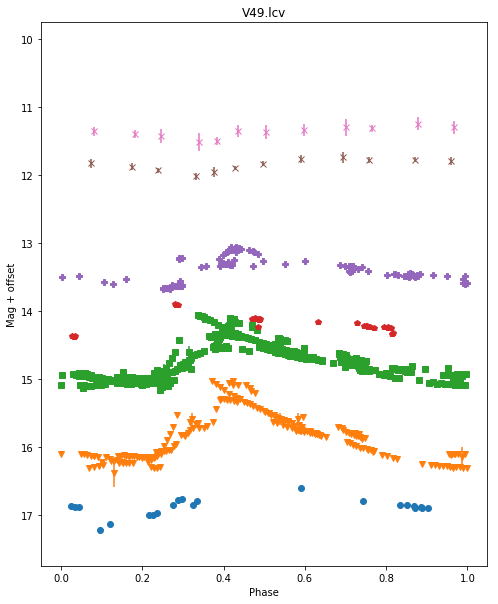

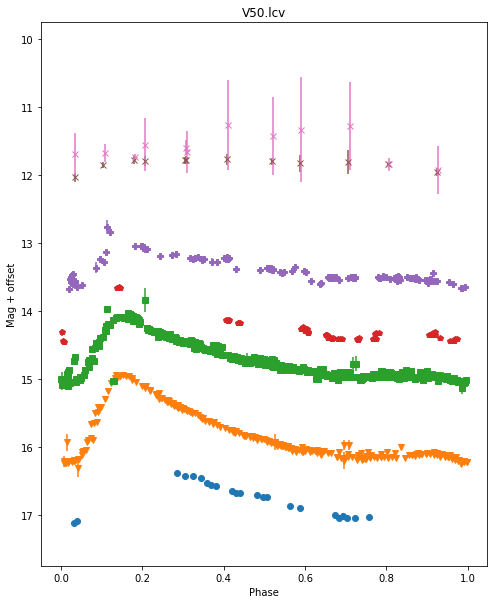

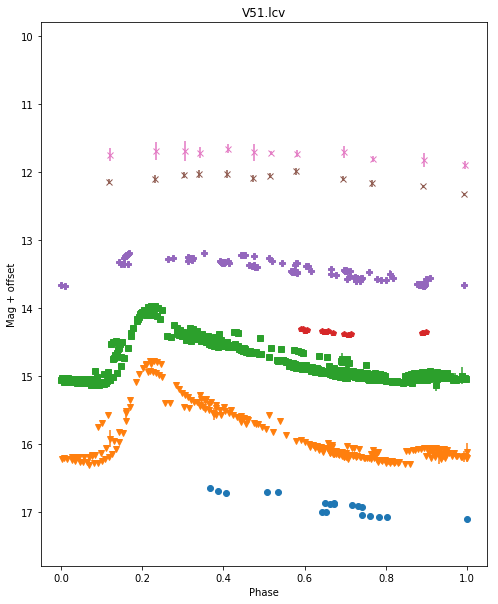

V52  not found.
V53  not found.
V54  not found.


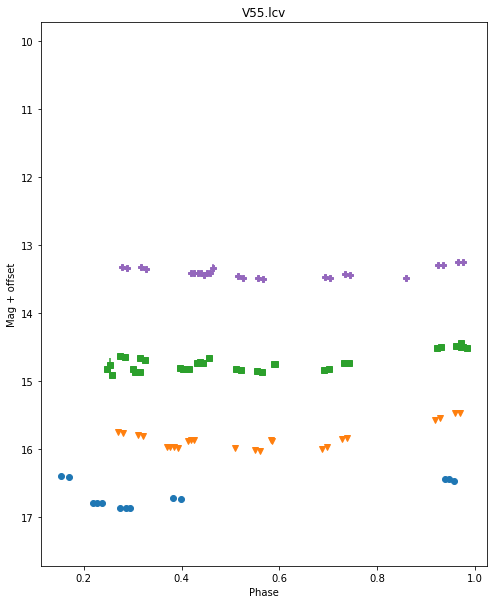

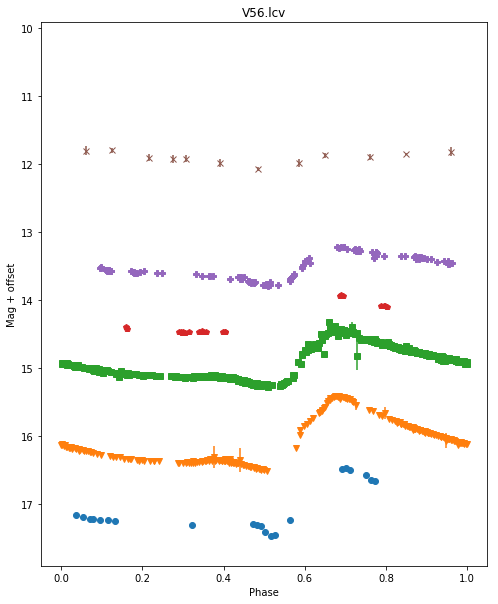

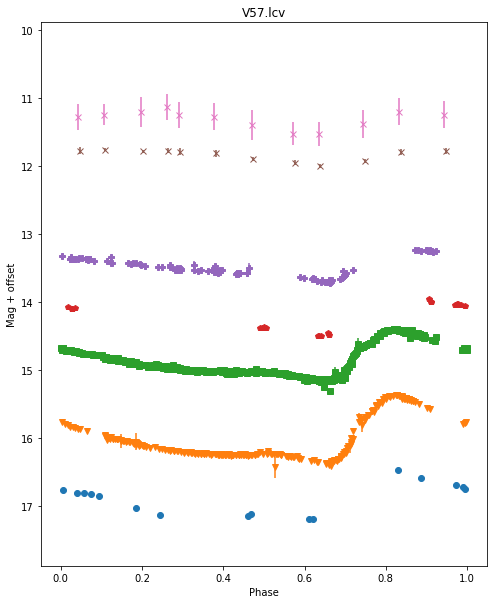

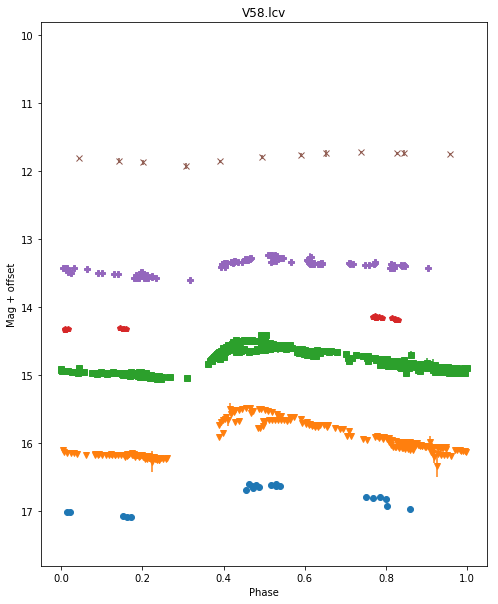

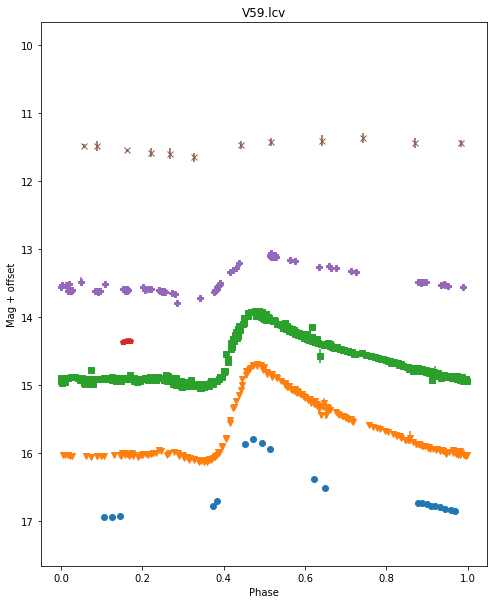

V60  not found.
V61  not found.
V62  not found.
V63  not found.
V64  not found.


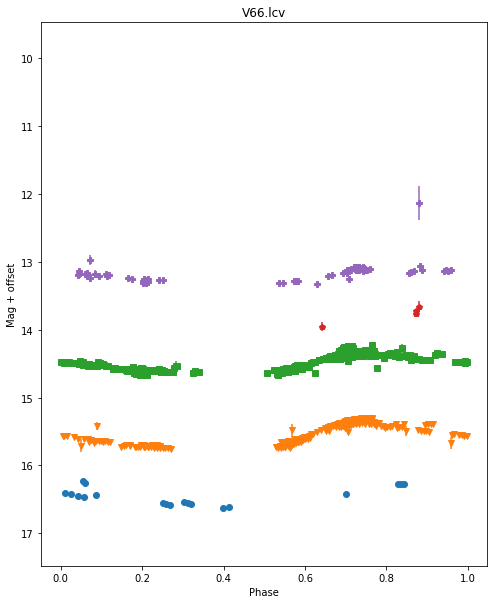

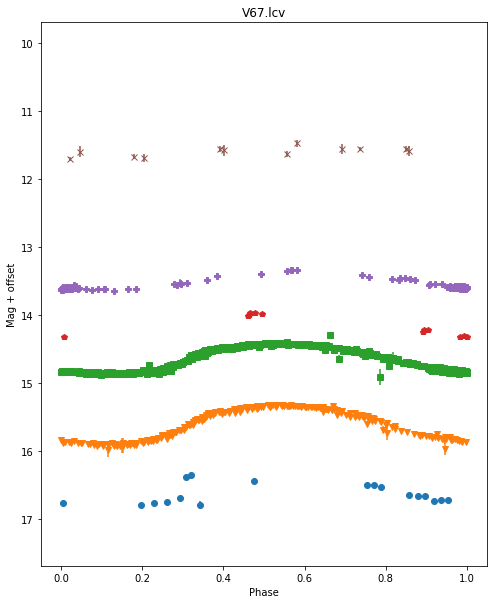

V69  not found.


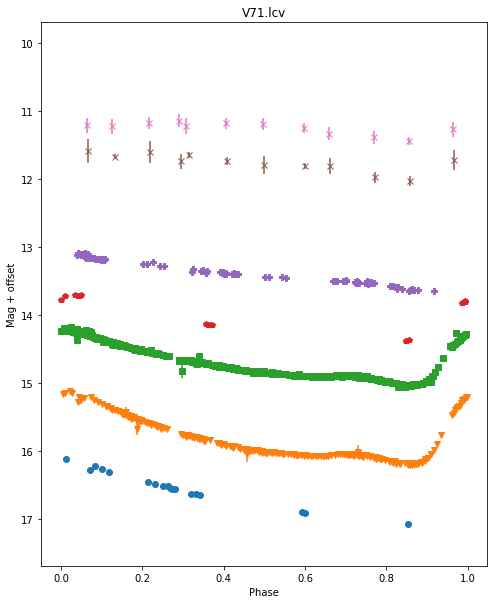

V72  not found.


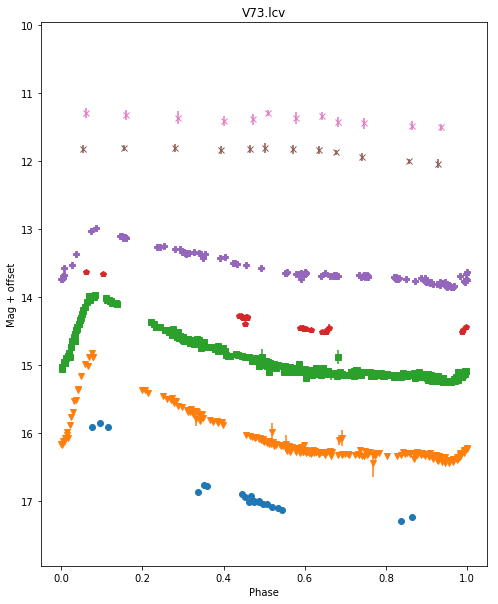

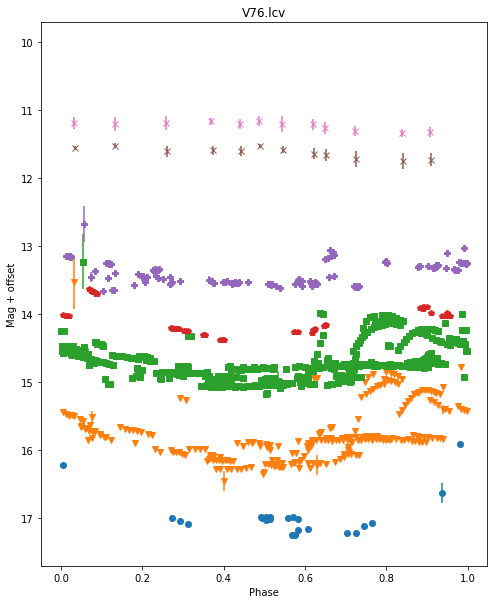

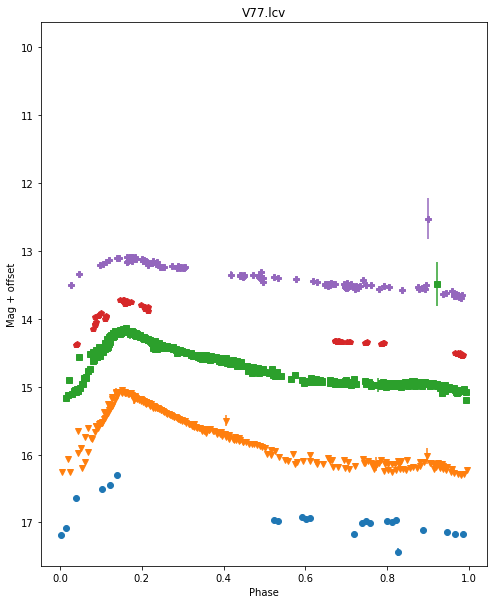

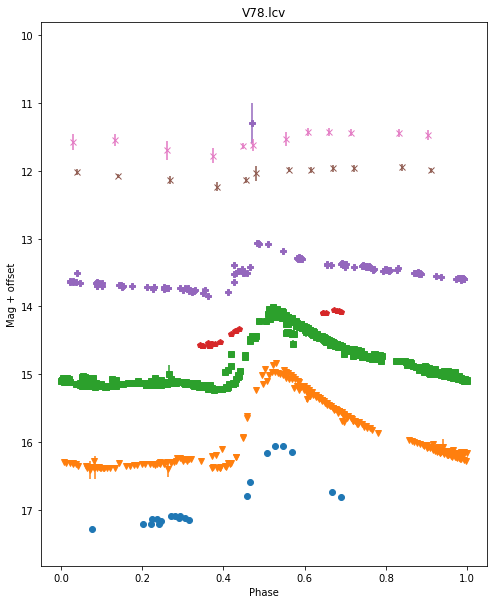

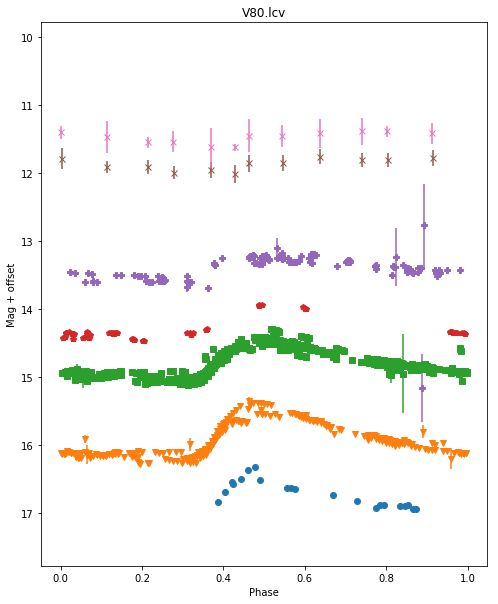

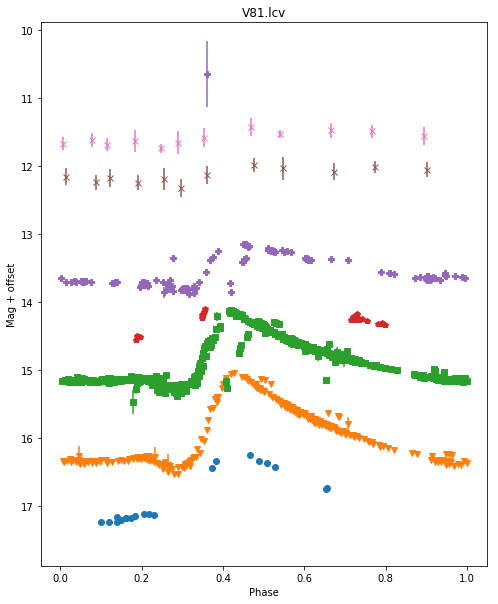

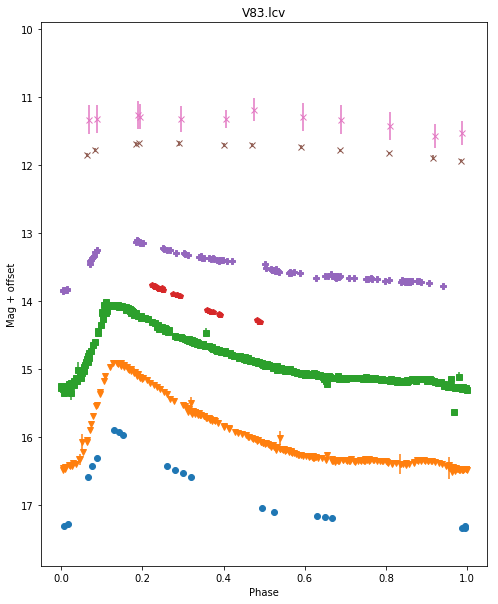

V84  not found.
V87  not found.
V88  not found.


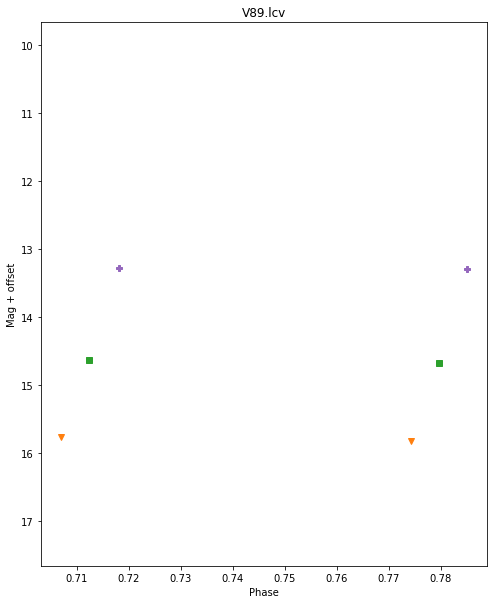

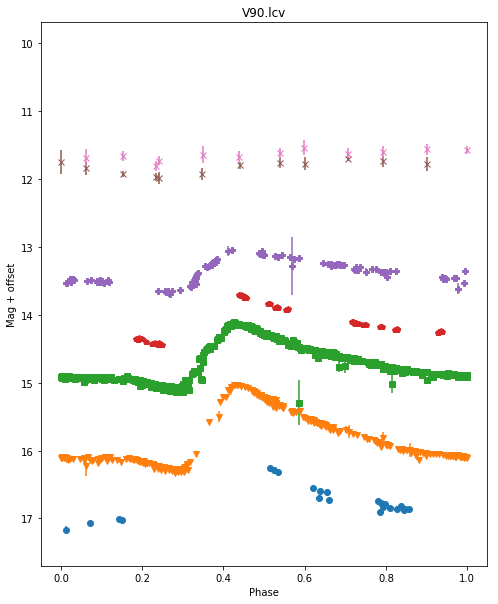

V91  not found.


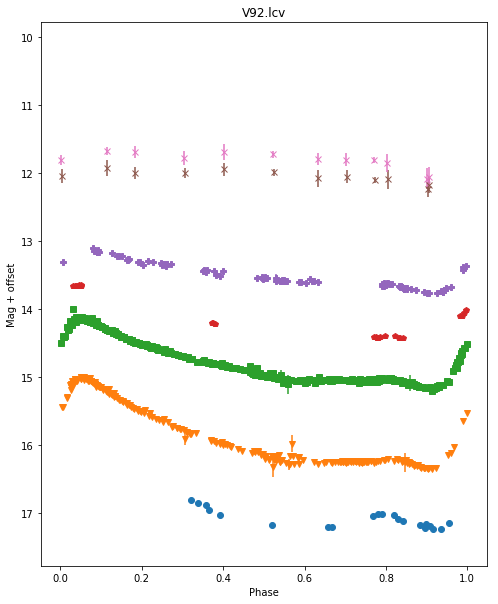

V93  not found.
V96  not found.


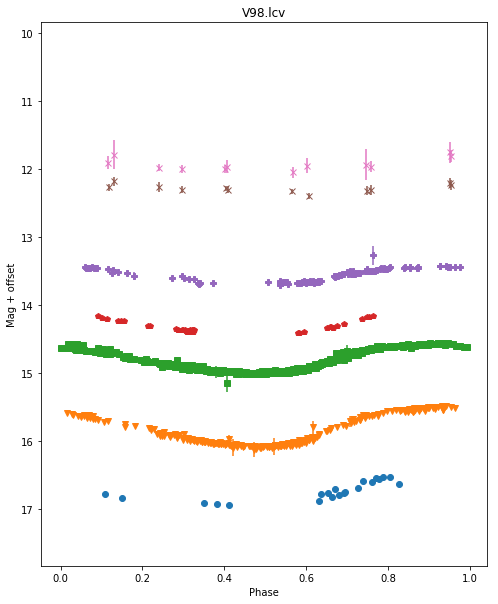

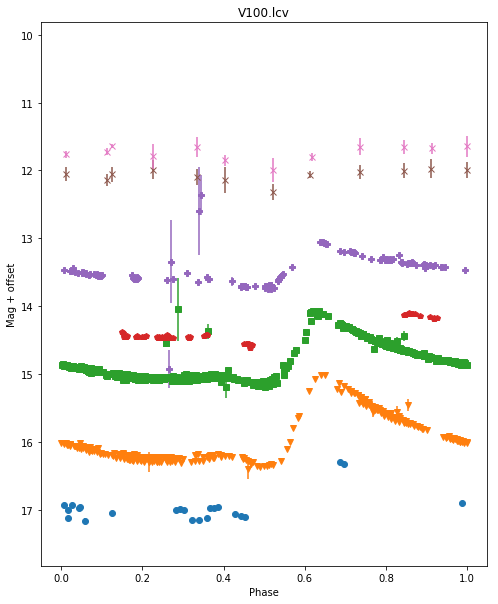

In [4]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables-new.txt', dtype=dtype1, usecols=(0,1,2))
for ind, star in enumerate(data['id']):
    try:
        if np.isnan(data['new_period'][ind]):
            lightcurves.phase_lcv_all_bands(target, star+'.lcv',data['cc_period'][ind], 0, bin_mir=1, data_dir=folder)
        else:
            lightcurves.phase_lcv_all_bands(target, star+'.lcv',data['new_period'][ind], 0, bin_mir=1, data_dir=folder)
    except:
        print star, ' not found.'
        continue

## Fit light curves

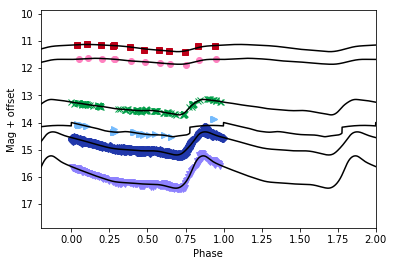

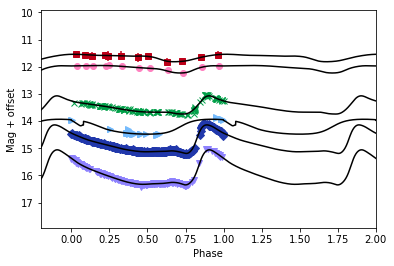

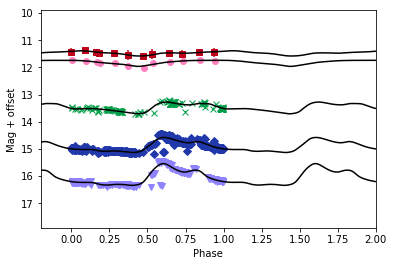

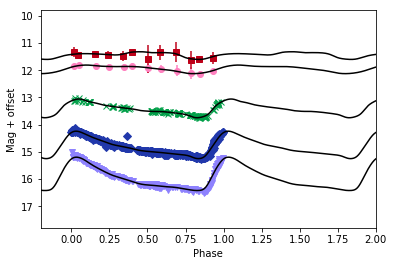

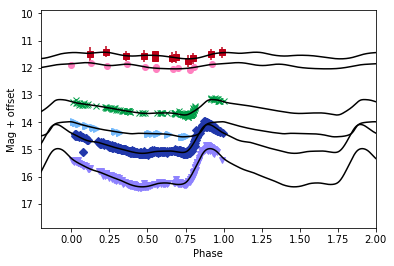

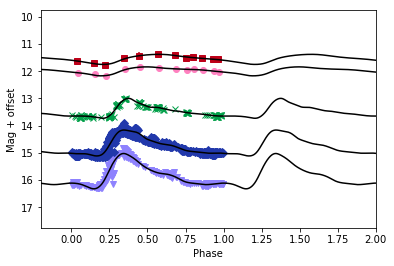

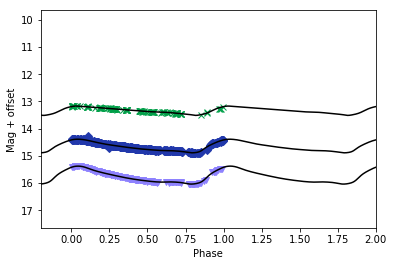

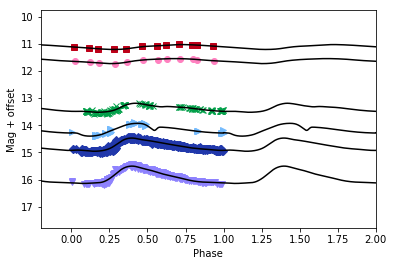

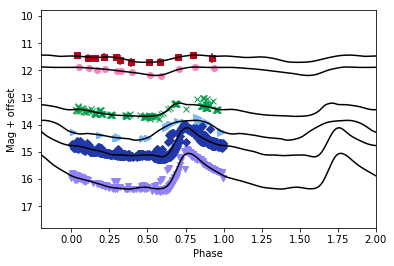

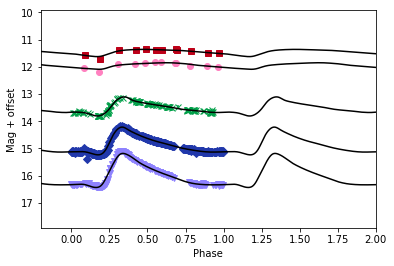

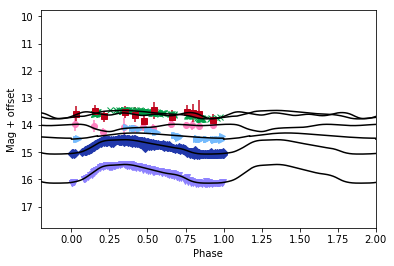

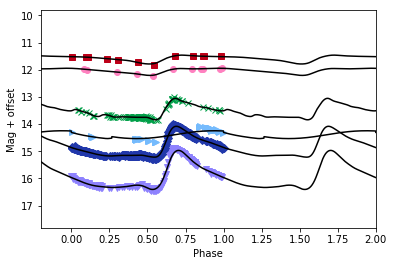

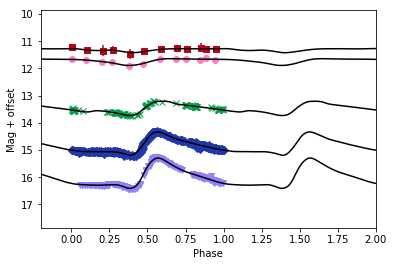

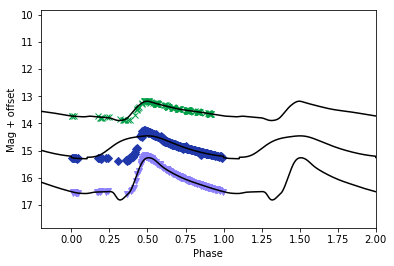

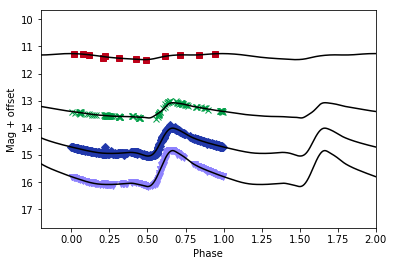

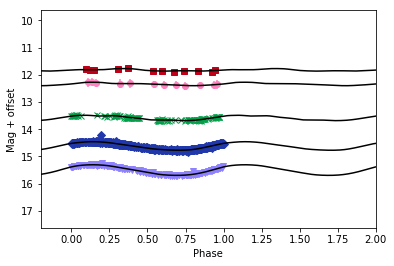

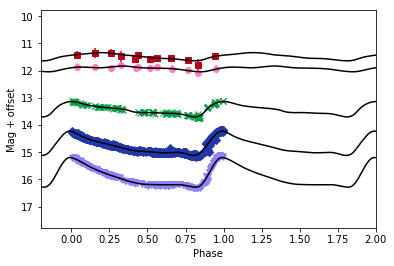

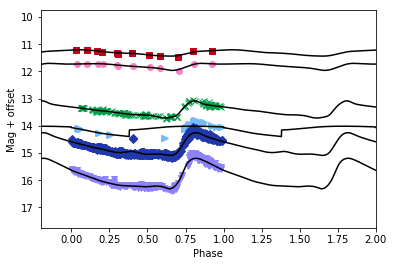

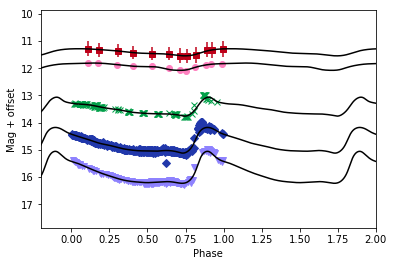

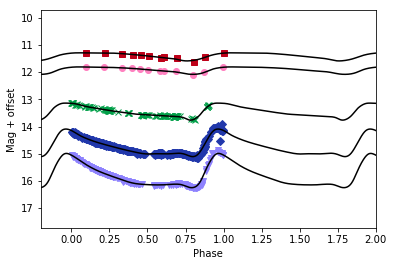

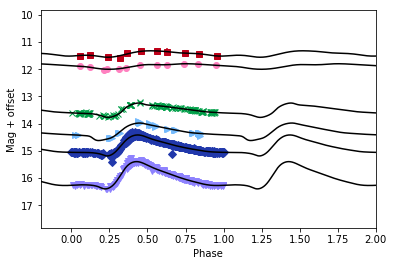

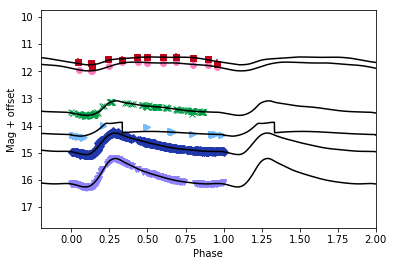

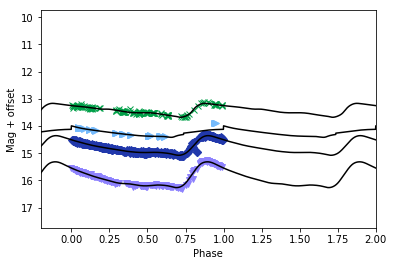

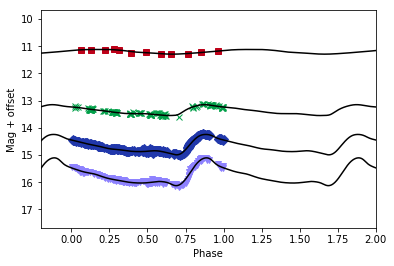

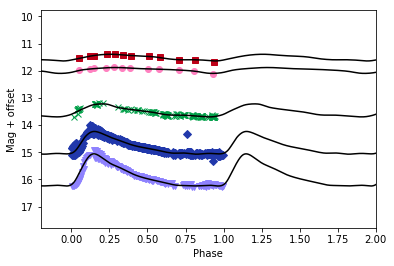

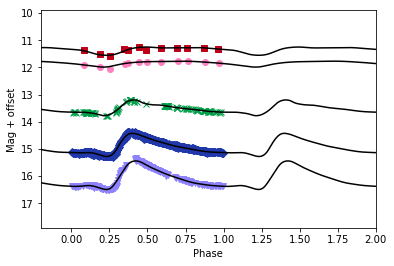

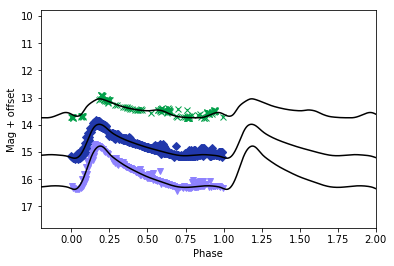

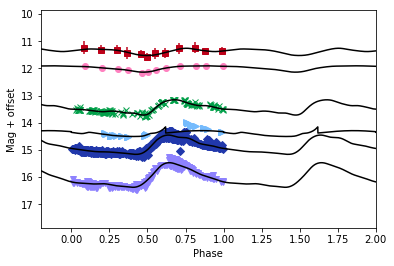

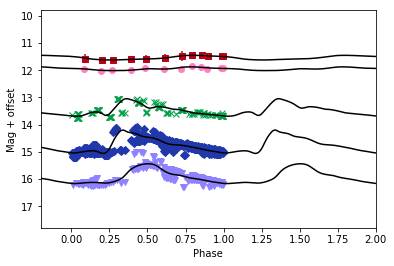

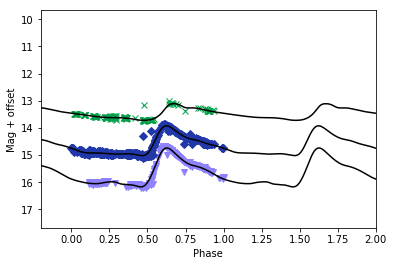

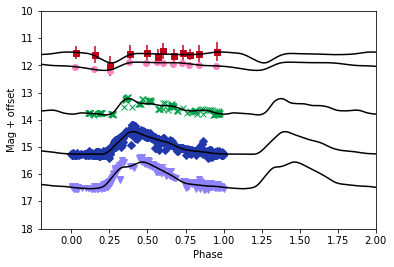

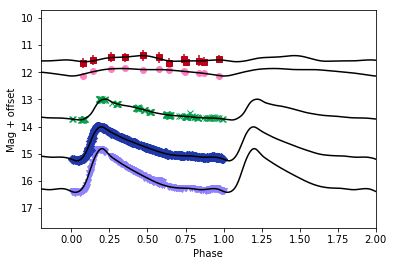

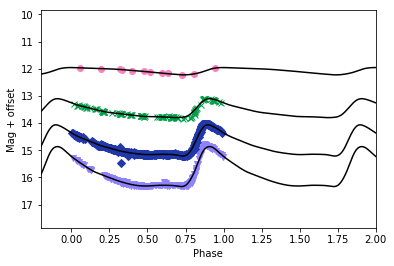

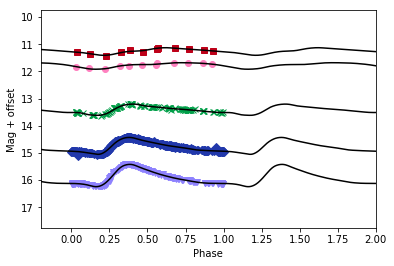

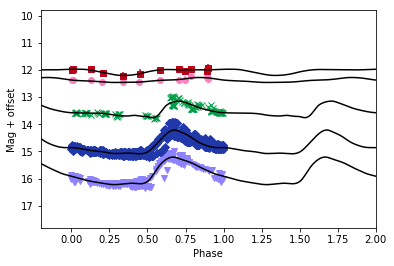

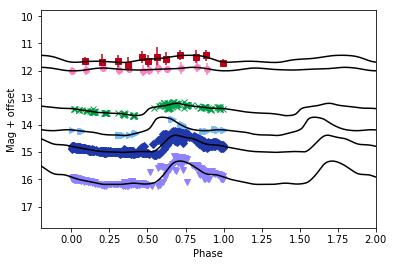

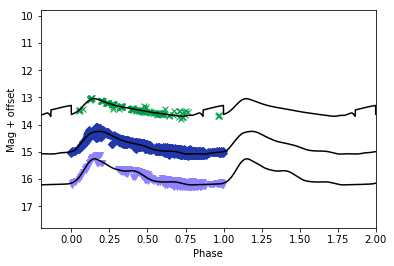

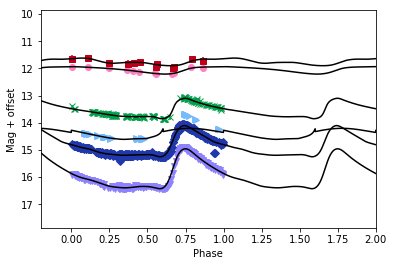

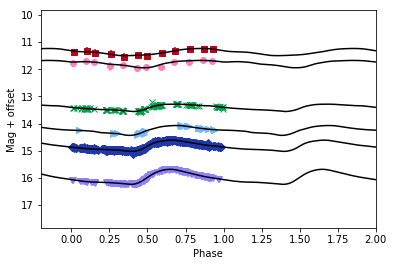

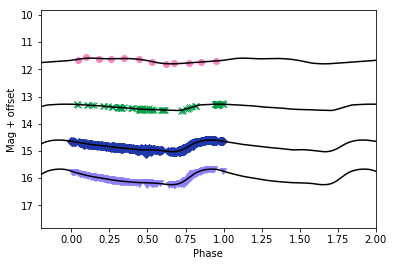

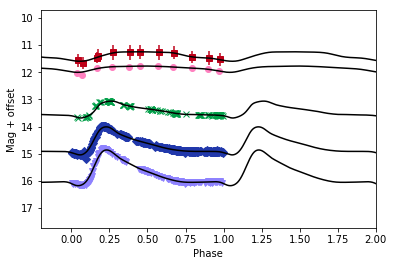

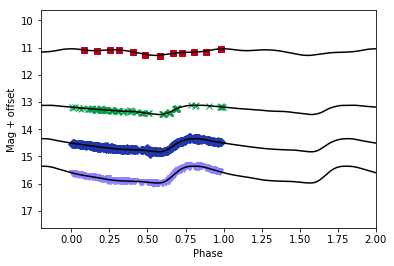

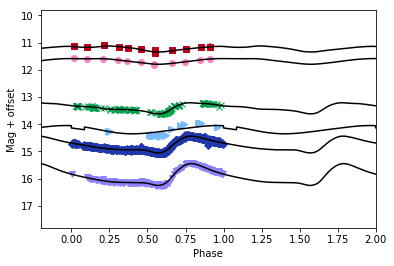

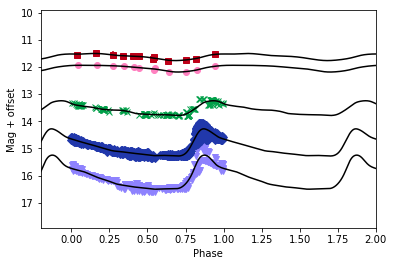

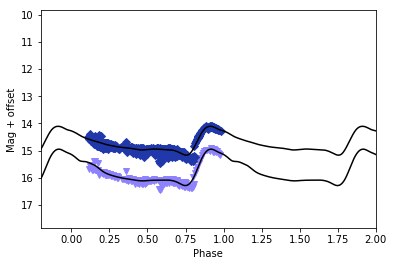

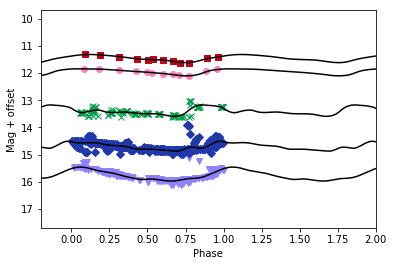

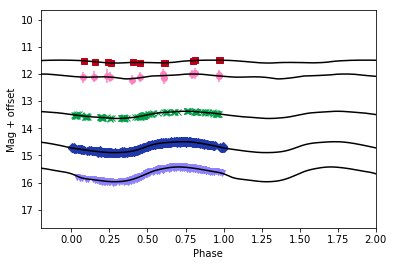

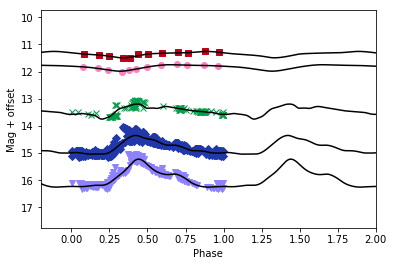

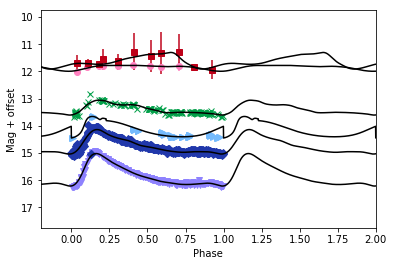

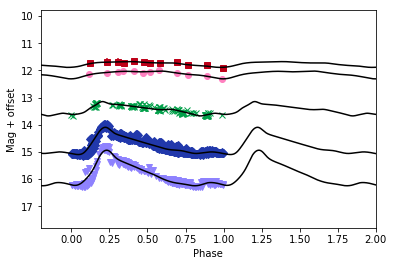

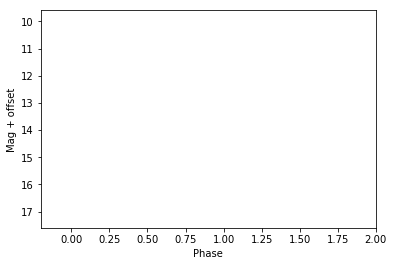

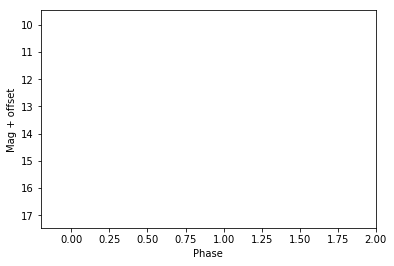

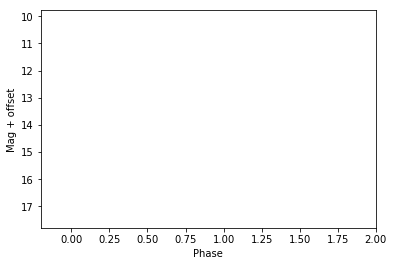

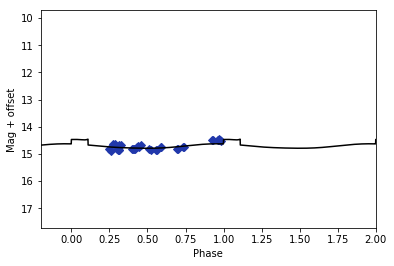

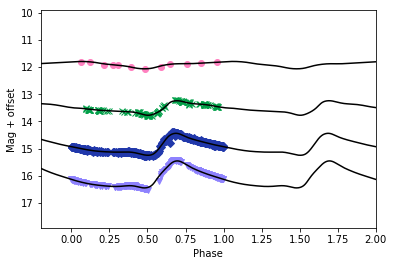

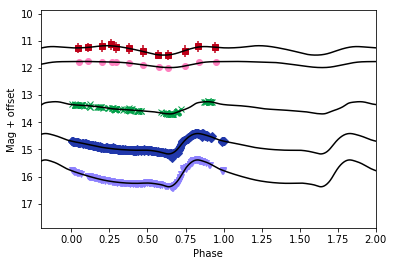

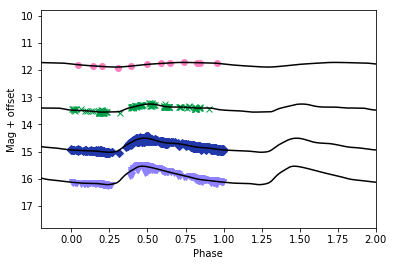

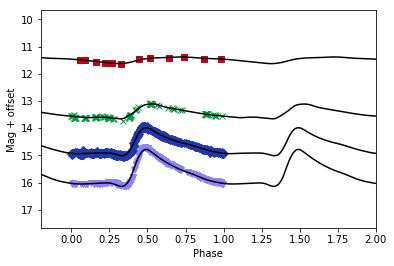

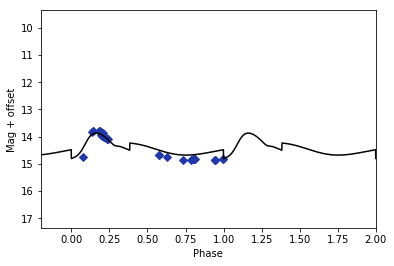

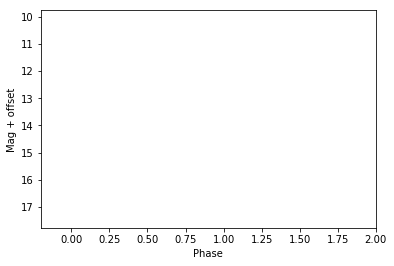

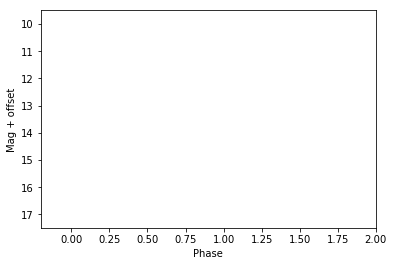

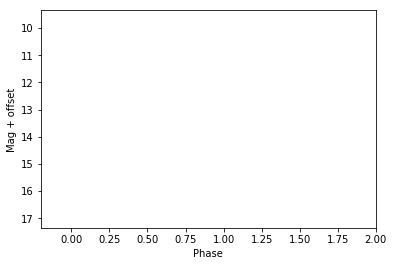

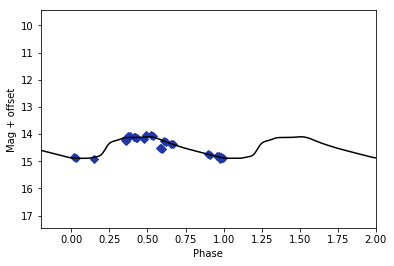

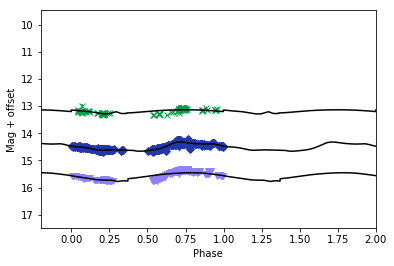

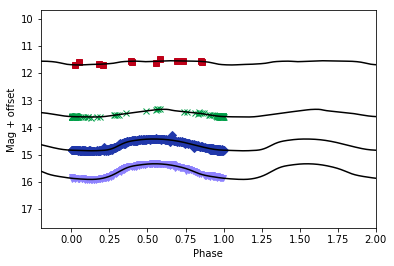

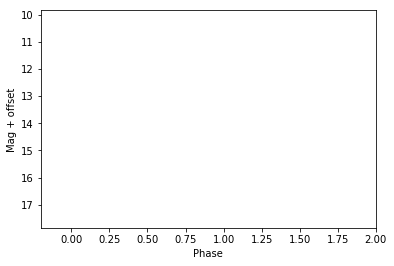

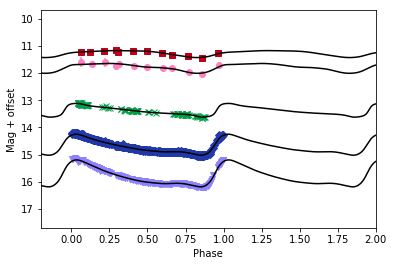

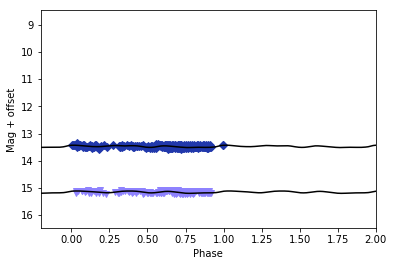

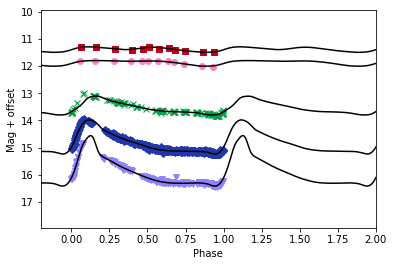

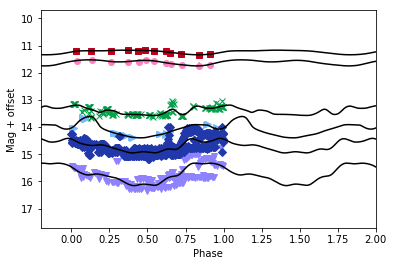

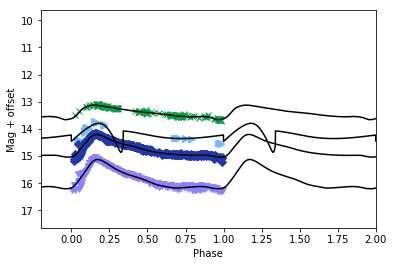

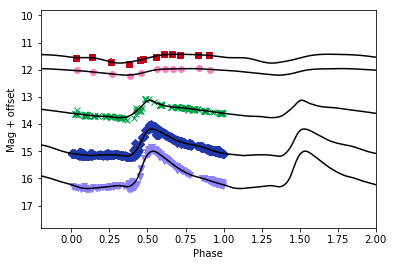

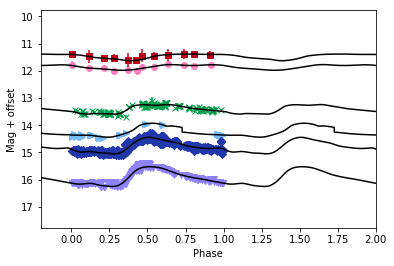

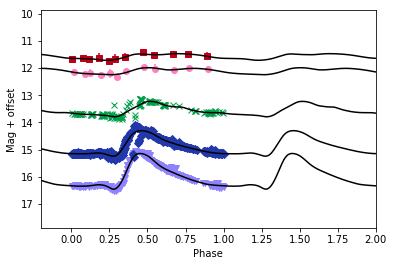

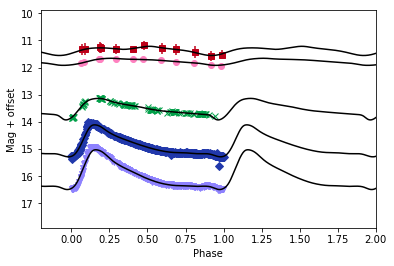

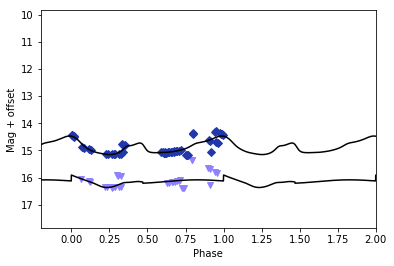

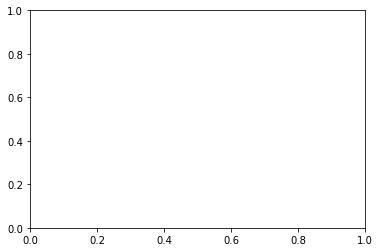

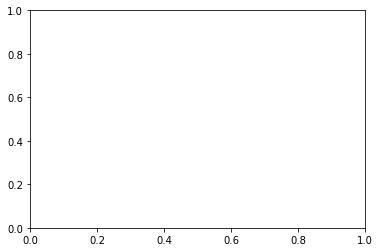

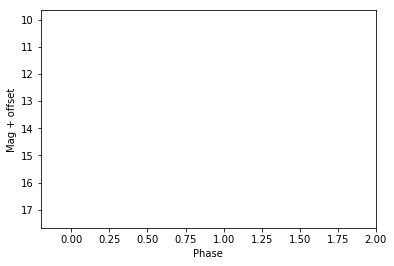

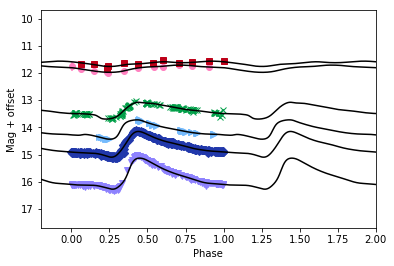

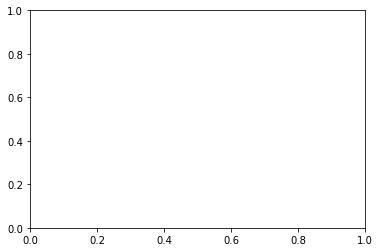

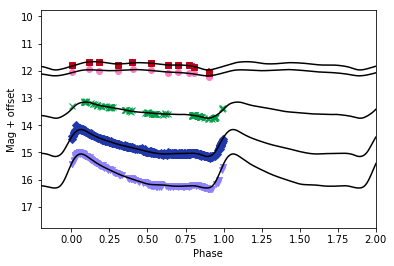

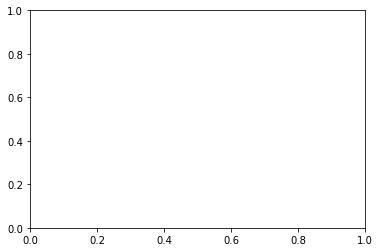

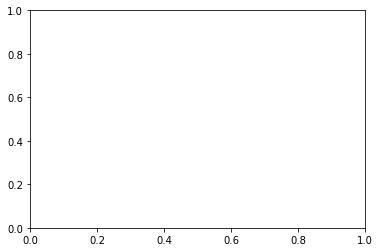

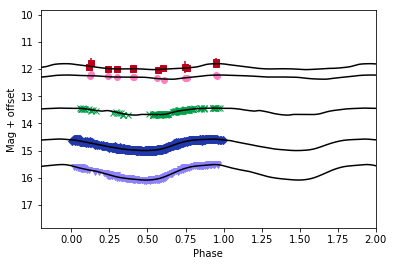

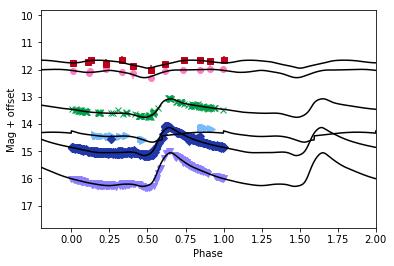

In [3]:
dtype1 = np.dtype([('id', 'S5'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables-new.txt', dtype=dtype1, usecols=(0,1,2))
f = open(folder+'avg_mags.txt', 'w')

for ind, star in enumerate(data['id']):
    try:
        filters, avgmag, err, amp, sigma = lightcurves.gloess(folder+'lcvs/'+star+'.phased', ask=0, master_plot=1, clean=1)
        datasave = np.array(zip(np.repeat(star, len(filters)),filters, np.repeat(data['new_period'][ind], len(filters)), avgmag, err, amp, sigma), dtype=[('c1', 'S5'), ('c2', 'S2'), ('c3', float), ('c4', float), ('c5', float), ('c6', float), ('c7', float)])
        np.savetxt(f, datasave, fmt='%5s %2s %10.8f %6.3f %6.4f %4.2f %4.2f')
    except:
        continue
        print 'Star '+star+' failed.'
f.close()

In [7]:
star = 'V1'
phased_lcv_file = folder+'lcvs/'+star+'.phased'

dtype1 = np.dtype([('filter', 'S2'), ('mjd', float), ('phase', float), ('mag', float), ('err', float)])
data = np.loadtxt(phased_lcv_file, dtype=dtype1, usecols=(0,1,2,3,4))

filt = 'I1'
mag = data['mag'][data['filter'] == filt]
phase = data['phase'][data['filter'] == filt]
print 1./len(mag)

0.0833333333333


V 14.818179586 0.849675645551


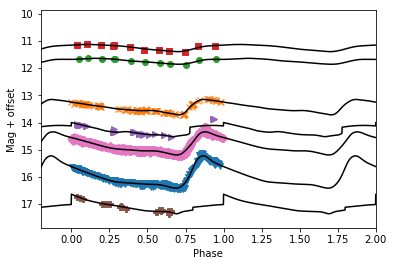

In [3]:
star = 'V1'

r1, r2, r3, r4, r5 = lightcurves.gloess(folder+'lcvs/'+star+'.phased', clean=1, master_plot=1)


/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in divide
/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in divide


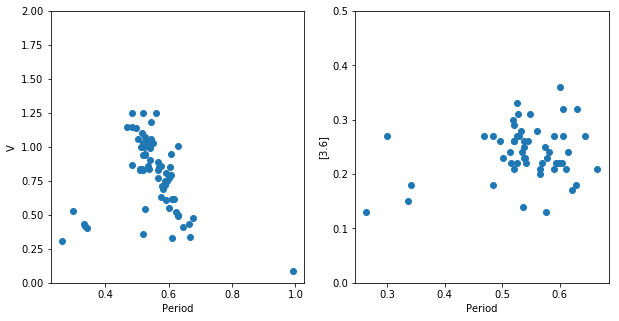

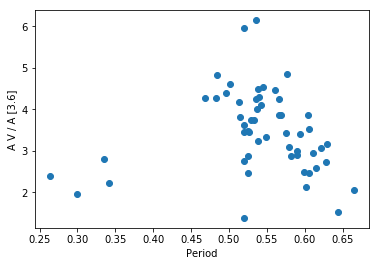

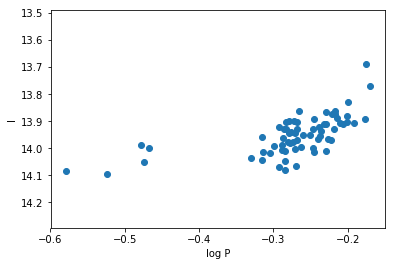

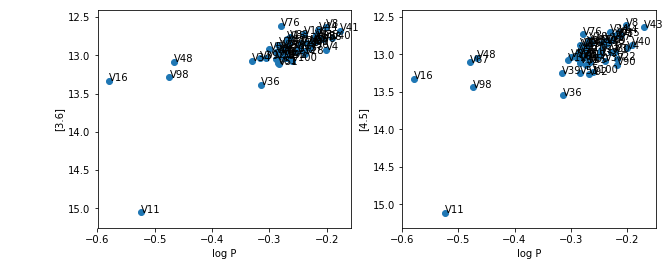

In [4]:
dtype = np.dtype([('star', 'S5'), ('filt', 'S2'), ('period', float), ('avg', float), ('amp', float)])
data = np.loadtxt(folder+'avg_mags.txt', dtype=dtype, usecols=(0,1,2,3,5))

perV = data['period'][data['filt'] == 'V']
perI1 = data['period'][data['filt'] == 'I1']
perI2 = data['period'][data['filt'] == 'I2']
Vamp = data['amp'][data['filt'] == 'V']
I1amp = data['amp'][data['filt'] == 'I1']
I2amp = data['amp'][data['filt'] == 'I2']
I1 = data['avg'][data['filt'] == 'I1']
I2 = data['avg'][data['filt'] == 'I2']
V = data['avg'][data['filt'] == 'V']

# Bailey diagram
fig = mp.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.plot(perV[V > 0], Vamp[V > 0], 'o')
ax.set_ylim((0,2))
ax.set_xlabel('Period')
ax.set_ylabel('V')
ax2 = fig.add_subplot(122)
ax2.plot(perI1[I1 > 0], I1amp[I1 > 0], 'o')
ax2.set_ylim((0,0.5))
ax2.set_xlabel('Period')
ax2.set_ylabel('[3.6]')


# amplitude ratio 

R_amp = Vamp/I1amp
fig3 = mp.figure()
ax4 = fig3.add_subplot(111)
ax4.plot(perV, R_amp, 'o')
ax4.set_xlabel('Period')
ax4.set_ylabel('A V / A [3.6]')

# I band PL relation
fig5 = mp.figure()
ax5 = fig5.add_subplot(111)
Iper = data['period'][data['filt'] == 'I']
I = data['avg'][data['filt'] == 'I']
ax5.plot(np.log10(Iper[I > 0]), I[I > 0], 'o')
ax5.set_ylim((np.max(I[I > 0])+0.2,np.min(I[I>0])-0.2))
ax5.set_xlabel('log P')
ax5.set_ylabel('I')

# IRAC PL relation
fig2 = mp.figure(figsize=(10,4))
ax1 = fig2.add_subplot(121)
ax2 = fig2.add_subplot(122)
ax1.plot(np.log10(perI1[I1 > 0]), I1[I1 > 0], 'o')
ax1.set_ylim((np.max(I1[I1 > 0])+0.2,np.min(I1[I1 > 0])-0.2))
ax1.set_xlabel('log P')
ax1.set_ylabel('[3.6]')
ax2.plot(np.log10(perI2[I2 > 0]), I2[I2 > 0], 'o')
ax2.set_ylim((np.max(I2[I2 > 0])+0.2,np.min(I2[I2 > 0])-0.2))
ax2.set_xlabel('log P')
ax2.set_ylabel('[4.5]')

I1_labels = data['star'][data['filt'] == 'I1']
for label, x, y in zip(I1_labels, np.log10(perI1), I1):
    ax1.annotate(label, xy=(x, y))

I2_labels = data['star'][data['filt'] == 'I2']
for label, x, y in zip(I2_labels, np.log10(perI2), I2):
    ax2.annotate(label, xy=(x, y))

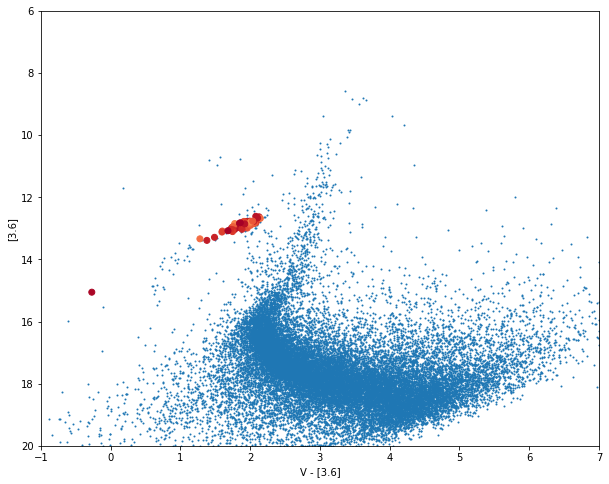

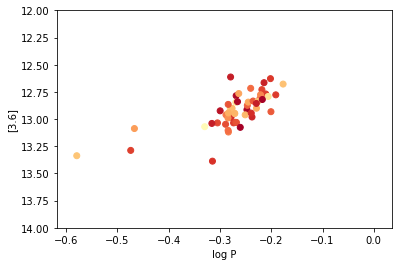

In [4]:
catalog_data = analysis_routines.read_merged_catalog(folder)

thres = 300
thres2 = 150
dist = catalog_data['rad_dist']
colorVIR = catalog_data['V'][dist > thres2] - catalog_data['3.6'][dist > thres2]
mag = catalog_data['V'][dist > thres2]
magIR = catalog_data['3.6'][dist > thres2]
err = catalog_data['3.6er'][dist > thres2]

good_mag = mag[err < 0.2]
good_color = colorVIR[err < 0.2]

fig2 = mp.figure(figsize=(10,8))
ax2 = fig2.add_subplot(111)
ax2.scatter(colorVIR, magIR, s=1, edgecolor=None)
ax2.set_ylim((20,6))
ax2.set_xlim((-1,7))
ax2.set_xlabel('V - [3.6]')
ax2.set_ylabel('[3.6]')

dtype = np.dtype([('star', 'S5'), ('filt', 'S2'), ('period', float), ('avg', float), ('err', float), ('amp', float)])
data = np.loadtxt(folder+'avg_mags.txt', dtype=dtype, usecols=(0,1,2,3,4,5))

dtype1 = np.dtype([('star', 'S10'), ('dao', int)])
dao_ids = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,1))

var_color = data['avg'][data['filt'] == 'V'] - data['avg'][data['filt'] == 'I1']
var_mag = data['avg'][data['filt'] == 'I1']
var_id = data['star'][data['filt'] == 'I1']
var_period = data['period'][data['filt'] == 'I1']
var_err = data['err'][data['filt'] == 'I1']

rdists = np.zeros(len(var_id))
for ind, star in enumerate(var_id):
    # find radial dist for this star
    dao_id = dao_ids['dao'][dao_ids['star'] == star]
    rdists[ind] = dist[catalog_data['id'] == dao_id[0]]

cm = mp.cm.get_cmap('RdYlBu')    
ax2.scatter(var_color, var_mag, c=rdists, cmap=cm) 
#ax2.plot(var_color, var_mag, 'o', color='r')

fig3 = mp.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(np.log10(var_period), var_mag, c=rdists, cmap=cm) 
#mp.colorbar()
#ax3.plot(np.log10(var_period), var_mag, 'o')
ax3.set_ylim((14,12))
ax3.set_xlabel('log P')
ax3.set_ylabel('[3.6]')



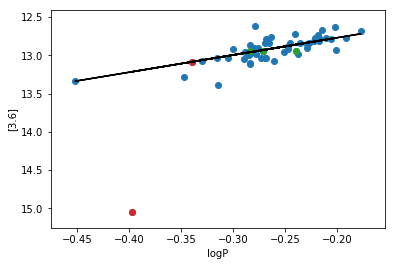

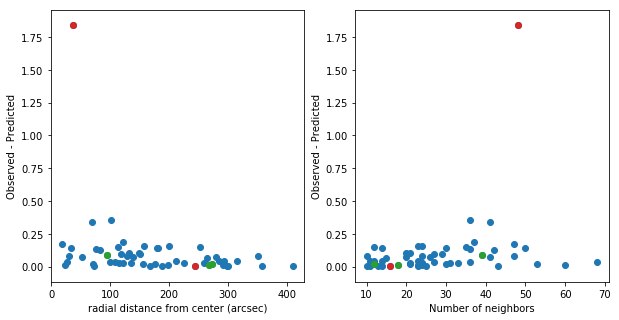

In [6]:
import numpy.ma as ma
var_mag = data['avg'][data['filt'] == 'I1']
var_id = data['star'][data['filt'] == 'I1']
var_period = data['period'][data['filt'] == 'I1']
var_err = data['err'][data['filt'] == 'I1']
var_mag = var_mag[~np.isnan(var_period)]
var_id = var_id[~np.isnan(var_period)]
var_err = var_err[~np.isnan(var_period)]
var_period = var_period[~np.isnan(var_period)]

cat_ra, cat_dec = coordinates.hms2deg(catalog_data['ra_h'], catalog_data['ra_m'], 
                                      catalog_data['ra_s'], catalog_data['dec_d'], 
                                      catalog_data['dec_m'], catalog_data['dec_s'])

rdists = np.zeros(len(var_id))
num_neighbors = np.zeros(len(var_id))
for ind, star in enumerate(var_id):
    # find radial dist for this star
    dao_id = dao_ids['dao'][dao_ids['star'] == star]
    rdists[ind] = dist[catalog_data['id'] == dao_id[0]]
    # find neighbors
    # need to find coordinates of the RRL 
    RRL_ra = cat_ra[catalog_data['id'] == dao_id[0]]
    RRL_dec = cat_dec[catalog_data['id'] == dao_id[0]]
    d = coordinates.radial_dist(RRL_ra, RRL_dec, cat_ra, cat_dec)
    num_neighbors[ind] = len(d[d < 8.0])
    
var_id = var_id[var_mag > 0]
var_logP = np.log10(var_period[var_mag > 0])
rdists = rdists[var_mag > 0]
var_err = var_err[var_mag > 0]
num_neighbors = num_neighbors[var_mag > 0]
var_mag = var_mag[var_mag > 0]
var_logP[var_logP < -0.4] += 0.127

# Double mode RRL
# V66
double = ['V66'] 
mask_double = np.in1d(var_id, double)

# Stars with bad periods
# V29, V37, V47, V76, 
bad_period = ['V29', 'V37', 'V47']
mask_period = np.in1d(var_id, bad_period)

# Other stars with bad MIR lcvs
bad_lcv = ['V11', 'V48']
mask_lcv = np.in1d(var_id, bad_lcv)


# Theoretical relation
feh = -1.59
mu = 13.40
plz = -2.251*var_logP + 0.180*feh - 0.793 + mu
fig1 = mp.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter(var_logP, var_mag)
ax1.scatter(var_logP[mask_double], var_mag[mask_double])
ax1.scatter(var_logP[mask_period], var_mag[mask_period])
ax1.scatter(var_logP[mask_lcv], var_mag[mask_lcv])
ax1.plot(var_logP, plz, 'k-')
ax1.set_ylim(np.max(var_mag)+0.2, np.min(var_mag)-0.2)
ax1.set_xlabel('logP')
ax1.set_ylabel('[3.6]')

residuals = np.abs(var_mag - plz)
fig2 = mp.figure(figsize=(10,5))
ax1 = fig2.add_subplot(121)
ax1.scatter(rdists, residuals)
ax1.scatter(rdists[mask_double], residuals[mask_double])
ax1.scatter(rdists[mask_period], residuals[mask_period])
ax1.scatter(rdists[mask_lcv], residuals[mask_lcv])
ax1.set_xlabel('radial distance from center (arcsec)')
ax1.set_ylabel('Observed - Predicted')
ax2 = fig2.add_subplot(122)
ax2.scatter(num_neighbors, residuals)
ax2.scatter(num_neighbors[mask_double], residuals[mask_double])
ax2.scatter(num_neighbors[mask_period], residuals[mask_period])
ax2.scatter(num_neighbors[mask_lcv], residuals[mask_lcv])
ax2.set_xlabel('Number of neighbors')
ax2.set_ylabel('Observed - Predicted')

[ -2.69857275  12.21060394]
0.107789073148
[ -2.82924014  12.18823329]
0.095559734945


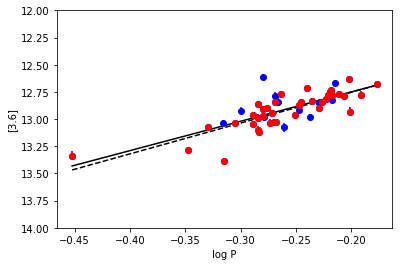

In [12]:
m_id = ma.array(var_id)
m_id[mask_double] = ma.masked
m_id[mask_period] = ma.masked
m_id[mask_lcv] = ma.masked
m_logP = ma.array(var_logP)
m_logP[mask_double] = ma.masked
m_logP[mask_period] = ma.masked
m_logP[mask_lcv] = ma.masked
m_mag = ma.array(var_mag)
m_mag[mask_double] = ma.masked
m_mag[mask_period] = ma.masked
m_mag[mask_lcv] = ma.masked
m_err = ma.array(var_err)
m_err[mask_double] = ma.masked
m_err[mask_period] = ma.masked
m_err[mask_lcv] = ma.masked

good_logP = m_logP[rdists > 100]
good_mag = m_mag[rdists > 100]
good_err = m_err[rdists > 100]
good_id = m_id[rdists > 100]


fig1 = mp.figure()
ax1 = fig1.add_subplot(111)
ax1.errorbar(m_logP, m_mag, yerr=m_err, fmt='o', color='b')
ax1.errorbar(good_logP, good_mag, yerr=good_err, fmt='o', color='r')
ax1.set_ylim((14,12))
ax1.set_xlabel('log P')
ax1.set_ylabel('[3.6]')

fit = ma.polyfit(m_logP, m_mag, 1)
print fit
residuals =m_mag - (fit[0]*m_logP + fit[1])
print np.std(residuals)

fit2 = ma.polyfit(good_logP, good_mag, 1)
print fit2
x_line = np.array([np.min(m_logP), np.max(m_logP)])
yline1 = fit[0]*x_line+fit[1]
yline2 = fit2[0]*x_line+fit2[1]

ax1.plot(x_line, yline1, 'k-')
ax1.plot(x_line, yline2, 'k--')


residuals2 = good_mag - (fit2[0]*good_logP + fit2[1])

print np.std(residuals2)

[9, 53, 22, 28, 36, 45]
[ -4.45740934  11.77812312]
[ -2.27015343  12.31879549]
0.0751194618857


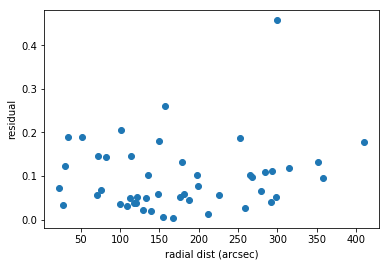

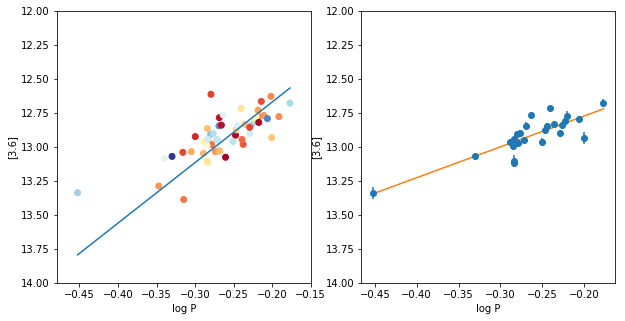

In [11]:
import numpy.ma as ma
var_mag = data['avg'][data['filt'] == 'I1']
var_id = data['star'][data['filt'] == 'I1']
var_period = data['period'][data['filt'] == 'I1']
var_err = data['err'][data['filt'] == 'I1']
rdists = np.zeros(len(var_id))
for ind, star in enumerate(var_id):
    # find radial dist for this star
    dao_id = dao_ids['dao'][dao_ids['star'] == star]
    rdists[ind] = dist[catalog_data['id'] == dao_id[0]]
    
var_id = var_id[var_mag > 0]
var_logP = np.log10(var_period[var_mag > 0])
rdists = rdists[var_mag > 0]
var_err = var_err[var_mag > 0]
var_mag = var_mag[var_mag > 0]
var_logP[var_logP < -0.4] += 0.127


# V76, V66, V37, V29 don't have well defined periods in optical data
# V11, V100, V48 seem like bad matches in MIR
# remove stars with bad light curves
bad_lcv = ['V11', 'V100', 'V29', 'V37', 'V48', 'V76']

bad_index = [np.argwhere(var_id == x)[0][0] for x in bad_lcv]
print bad_index
masked_id = ma.array(var_id)
masked_id[bad_index] = ma.masked
masked_logP = ma.array(var_logP)
masked_logP[bad_index] = ma.masked
masked_mag = ma.array(var_mag)
masked_mag[bad_index] = ma.masked
masked_dists = ma.array(rdists)
masked_dists[bad_index] = ma.masked
masked_err = ma.array(var_err)
masked_err[bad_index] = ma.masked
# remove stars with questionable period?
# identify blended radius?
# remove stars near core of the cluster

fit = np.polyfit(masked_logP, masked_mag, 1)
print fit
residuals = np.abs(masked_mag - (fit[0]*masked_logP+fit[1]))
fig1 = mp.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(masked_dists, residuals, 'o')
ax1.set_xlabel('radial dist (arcsec)')
ax1.set_ylabel('residual')

fig3 = mp.figure(figsize=(10,5))
ax3 = fig3.add_subplot(121)
ax3.scatter(var_logP, var_mag, c=rdists, cmap=cm) 
#mp.colorbar()
#ax3.plot(np.log10(var_period), var_mag, 'o')
x_line = np.array([np.min(var_logP), np.max(var_logP)])
y_line = fit[0]*x_line + fit[1]
ax3.plot(x_line, y_line)
ax3.set_ylim((14,12))
ax3.set_xlabel('log P')
ax3.set_ylabel('[3.6]')
thresh = 150.
good_logP = masked_logP[masked_dists > thresh]
good_mag = masked_mag[masked_dists > thresh]
good_err = masked_err[masked_dists > thresh]
ax4 = fig3.add_subplot(122)
#ax4.scatter(masked_logP[masked_dists > thresh], masked_mag[masked_dists > thresh], c=masked_dists[masked_dists > thresh], cmap=cm) 
ax4.errorbar(good_logP, good_mag, yerr = good_err, fmt='o')
ax4.set_ylim((14,12))
ax4.set_xlabel('log P')
ax4.set_ylabel('[3.6]')

fit2 = np.polyfit(good_logP, good_mag, 1)
yline2 = fit2[0]*x_line+fit2[1]
ax4.plot(x_line, yline2)
residuals2 = good_mag - (fit2[0]*good_logP + fit2[1])
print fit2
print np.std(residuals2)

[9, 54, 24, 29, 37, 46]
[ -4.42940025  11.8391641 ]
[ -2.26257407  12.33891377]
0.0955254387842


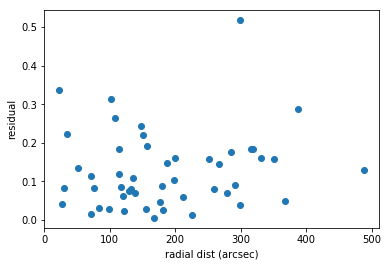

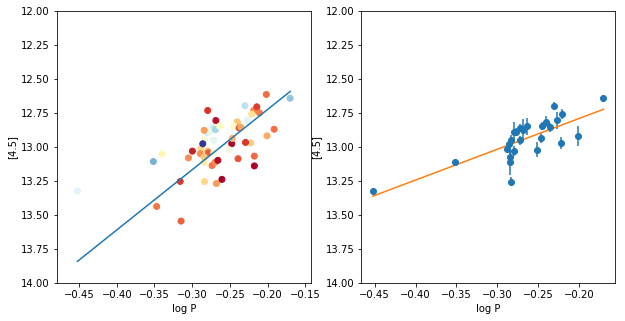

In [63]:
var_mag = data['avg'][data['filt'] == 'I2']
var_id = data['star'][data['filt'] == 'I2']
var_period = data['period'][data['filt'] == 'I2']
var_err = data['err'][data['filt'] == 'I2']
rdists = np.zeros(len(var_id))
for ind, star in enumerate(var_id):
    # find radial dist for this star
    dao_id = dao_ids['dao'][dao_ids['star'] == star]
    rdists[ind] = dist[catalog_data['id'] == dao_id[0]]
    
var_id = var_id[var_mag > 0]
var_logP = np.log10(var_period[var_mag > 0])
rdists = rdists[var_mag > 0]
var_err = var_err[var_mag > 0]
var_mag = var_mag[var_mag > 0]
var_logP[var_logP < -0.4] += 0.127



# remove stars with bad light curves
bad_lcv = ['V11', 'V100', 'V29', 'V37', 'V48', 'V76']

bad_index = [np.argwhere(var_id == x)[0][0] for x in bad_lcv]
print bad_index
masked_id = ma.array(var_id)
masked_id[bad_index] = ma.masked
masked_logP = ma.array(var_logP)
masked_logP[bad_index] = ma.masked
masked_mag = ma.array(var_mag)
masked_mag[bad_index] = ma.masked
masked_dists = ma.array(rdists)
masked_dists[bad_index] = ma.masked
masked_err = ma.array(var_err)
masked_err[bad_index] = ma.masked
# remove stars with questionable period?
# identify blended radius?
# remove stars near core of the cluster

fit = np.polyfit(masked_logP, masked_mag, 1)
print fit
residuals = np.abs(masked_mag - (fit[0]*masked_logP+fit[1]))
fig1 = mp.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(masked_dists, residuals, 'o')
ax1.set_xlabel('radial dist (arcsec)')
ax1.set_ylabel('residual')

fig3 = mp.figure(figsize=(10,5))
ax3 = fig3.add_subplot(121)
ax3.scatter(var_logP, var_mag, c=rdists, cmap=cm) 
#mp.colorbar()
#ax3.plot(np.log10(var_period), var_mag, 'o')
x_line = np.array([np.min(var_logP), np.max(var_logP)])
y_line = fit[0]*x_line + fit[1]
ax3.plot(x_line, y_line)
ax3.set_ylim((14,12))
ax3.set_xlabel('log P')
ax3.set_ylabel('[4.5]')
thresh = 150.
good_logP = masked_logP[masked_dists > thresh]
good_mag = masked_mag[masked_dists > thresh]
good_err = masked_err[masked_dists > thresh]
ax4 = fig3.add_subplot(122)
#ax4.scatter(masked_logP[masked_dists > thresh], masked_mag[masked_dists > thresh], c=masked_dists[masked_dists > thresh], cmap=cm) 
ax4.errorbar(good_logP, good_mag, yerr = good_err, fmt='o')
ax4.set_ylim((14,12))
ax4.set_xlabel('log P')
ax4.set_ylabel('[4.5]')

fit2 = np.polyfit(good_logP, good_mag, 1)
yline2 = fit2[0]*x_line+fit2[1]
ax4.plot(x_line, yline2)
residuals2 = good_mag - (fit2[0]*good_logP + fit2[1])
print fit2
print np.std(residuals2)